# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [146]:
# Libraries needed
import joblib
#joblib.dump(model_final,'churn_model.pkl')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from xgboost import XGBClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              BaggingClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier,
                              )
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score,
                             recall_score,
                             precision_score,
                             f1_score,
                             make_scorer
                             )
# model = AdaBoostClassifier(
    # estimator=DecisionTreeClassifier(max_depth=2),
    # learning_rate=0.05,
    # random_state=1
# )

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

* Libraries successfully loaded.

In [10]:
# Preventing scientific notation.
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

* Code ran to block scientific notation.

## Loading the dataset

In [11]:
# Importing and mounting google drive to access the data in colab.

# from google.colab import drive
# drive.mount('/content/drive')

* Accessing google drive to save/read data.

In [147]:
# Saving the path of the .csv file.
path = 'BankChurners (1).csv'
# Creating the data frame, data, to load the .csv to the notebook
data = pd.read_csv(path)
# Creating copy of the data frame, df, to keep the original data unaltered.
df = data.copy()

* Loaded data into a pandas dataframe named data.
* Created a copy of data frame called df to keep original data unmodified.

## Data Overview

In [13]:
# Shape of the data frame.
df.shape

(10127, 21)

* The data set has 10,127 rows and 21 columns.

In [148]:
# First 5 rows of the data frame.
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


* The top 5 rows of the data set.
* Some columns are omitted to save space.

In [15]:
# Last 5 rows of the data frame.
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


* The last 5 rows of the data set.
* Some columns are omitted to save space.

In [16]:
# Information about the data frame's columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* All columns except 6 are numerical columns. The other 6 are of the object data type.
* 19 columns have no null values, 2 columns have null values.

In [17]:
# Checking the data frame for duplicate values.
df.duplicated().value_counts()

False    10127
Name: count, dtype: int64

 There are no duplicated entries (rows).

In [18]:
# Checking the data frame for na values.
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* `Education_Level` has 1519 null values.
* `Marital_Status` has 749 null values.
* These values will be imputed after splitting the data into training, validation, and test sets to avoid data leakage.

In [19]:
# Statistical summary of the columns with data type of "Int64" and "Float64".
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


**Observations**
* `CLIENTNUM` is unique for all customers and will not be useful for analysis. This column will be dropped later.
* `Customer_Age` has a mean of 46 years, a min of 26, and a max of 73 years.
* `Dependent_count` has a mean of 2.3 dependents, a min of 0, and a max of 5 dependents.
* `Months_on_book` has a mean of 35.9 months, a min of 13, and a max of 56 months.
* `Total_Relationship_Count` has a mean of 3.8 products with the bank, a min of 1, and a max of 6 products with the bank.
* `Months_Inactive_12_mon` has a mean of 2.3 months, a min of 0, and a max of 6 months.
* `Contacts_Count_12_mon` has a mean of 2.4 times contacted, a min of 0, and a max of 6 contacts.
* `Credit_Limit` has a mean of 8632 dollars, a min of 1438, and a max of 34516 dollars (rounded to nearest dollar). This is a very large range.
* `Total_Revolving_Bal` has a mean of 1163 dollars, a min of 0, and a max of 2517.
* `Avg_Open_To_Buy` has a mean of 7469 dollars, a min of 3, and a max of 34516 dollar. This is a very large range.
* `Total_Amt_Chng_Q4_Q1` has a mean of 0.76, a min of 0, and a max of 3.397. This is a ratio of amount spent in Q4 to amount spend in Q1 (Q4/Q1).
* `Total_Trans_Amt` has a mean of 4404 dollars, a min of 510, and a max of 18484 dollars.
* `Total_Trans_Ct` has a mean of 64.8 total transactions, min of 10, and a max of 139 total transactions.
* `Total_Ct_Chng_Q4_Q1` has a mean 0.71, a min of 0, and a max of 3.71. This is a ratio of number of transactions in Q4 to number of transactions in Q1 (Q4/Q1).
* `Avg_Utilization_Ratio` has a mean of 27.5%, a min of 0%, and a max of 99.9%. This is the customers percent of credit used.

In [20]:
# Statistical summary of the columns with data type of "object".
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


**Observations**
* `Attrition_Flag` has 10127 non-null entries and 2 unique entries, with the most frequent being "Existing Customer".
* `Gender` has 10127 non-null entries and 2 unique entries, with the most frequent being "F".
* `Education_Level` has 8608 non-null entries and 6 unique entries, with the most frequent being "Graduate". *Null values are present and will be imputed after data is split into training, validation, and test sets to avoid data leakage.*
* `Marital_Status` has 9369 non-null entries and 3 unique entries, with the most frequent being "Married". *Null values are present and will be imputed after data is split into training, validation, and test sets to avoid data leakage.*
* `Income_Category` has 10127 non-null entries and 6 unique entries, with the most frequent being "Less than 40k"
* `Card_Category` has 10127 non-null entries and 4 unique entries, with the most frequent being "Blue".

In [21]:
# Checking the percentages of classes in the target variable column.
df['Attrition_Flag'].value_counts(1)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

* 83.9% of customers are existing customers.

## Data Preprocessing

In [149]:
# Dropping "CLIENTNUM" column beacuse it is unnecessary information for analysis.
df = df.drop('CLIENTNUM', axis=1)

* Dropping "CLIENTNUM" as each is unique and will not add to analysis.

In [150]:
## Encoding Existing and Attrited customers to 1 and 0 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 1, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 0, inplace=True)

* Encoding "Existing Customer" to 1 and "Attrited Customer" to 0 to use in models.

In [151]:
# Top 5 rows of the new data frame.
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


* Observed encoding was successful.

In [152]:
# Checking the values of the Income_Category column.
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

* Observed 1112 entries of "abc" in the `Income_Category` column.

In [153]:
# Replacing "abc" entries in the Income_Category column with np.nan.
df['Income_Category'].replace('abc', np.nan, inplace=True)

* Replaced values of "abc" with "np.nan" (i.e. not a number).

In [154]:
# Checking the new values of the Income_Category column.
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

* Observed "abc" values have been replaced.

In [28]:
# Observing the amount of non-null values in the Income_Category column.
# df['Income_Category'].info()

* Null values will be imputed after splitting data into traning, validation, and test sets to avoid data leakage.

In [155]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Card_Category',
    'Income_Category'
]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

* Converted columns with data type of "object" to "category" for use in analysis.

In [156]:
# Observing the data types of the new data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

* Observed the data types were changed to "category".

In [157]:
# Checking for new na values, will impute after train-test split to avoid data leakage.
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Observed new null values in `Income_Category` column.
* Null values will be imputed after splitting data into training, validation, and test sets to avoid data leakage.

## Exploratory Data Analysis (EDA)

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



**Answers**:


---


1. The `Total_Trans_Amt` is right skewed, with a median of about 4000.


---


2. The distribution of `Education_Level`:
    * Graduate degree - 36%
    * High school diploma - 23%
    * Uneducated - 17%
    * Bachelor's - 11.8%
    * Post-Graduate - 6%
    * Doctorate - 5.2%  


---


3. The distribution of `Income_Level`:
    * Less than 40K - 39.9%
    * 40k - 60k - 19.9%
    * 80k - 120k - 17%
    * 60k - 80k - 15.6%
    * 120k+ - 8.1%


---


4. `Total_Ct_Chng_Q4_Q1` is much lower for attrited customers compared to existing customers. Attrited customers have a median of about 50 whereas existing customers have a median of closer to 70. The ratio of Q4 transaction counts to Q1 transaction counts (Q4/Q1) is much higher for existing customers indicating that attrited customers are spending less at the end of the year than existing customers.


---


5. `Months_Inactice_12_mon` does have some affect on attrition, but a clear pattern is not obvious. Customers with 0 months inactive have about a 50-50 chance of being attrited, but all other values are much less likely to attrition.


---


6. Attributes with a strong correlation:
    * `Avg_Open_to_Buy` and `Credit_Limit` are completely positively correlated by necessity. As a customer's credit limit goes up, their open to buy also increases.
    * `Total_Trans_Amt` and `Total_Trans_Ct` are very highly positively correlated. This makes sense because the more transations a customer makes, the more the customer will spend.
    * `Customer_Age` and `Months_on_book` are highly positively correlated. This makes sense because as customers age, their time with the bank increases.
    * `Total_Revolving balance` and `Avg_Utilization_Ratio` is positively correlated. This makes sense because if a customer has a high utilization, they will likely have a higher revolving balance.
    * `Avg_Open_To_Buy` and `Avg_Utilization_Ratio` are negatively correlated. This is because the higher a customers utilization is, the less their amount open to buy will be.
    * `Credit_Limit` and `Avg_Utilization_Ratio` are negatively correlated. This is because customers with a higher credit limit tend to have a lower utilization.





#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [158]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [34]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [35]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

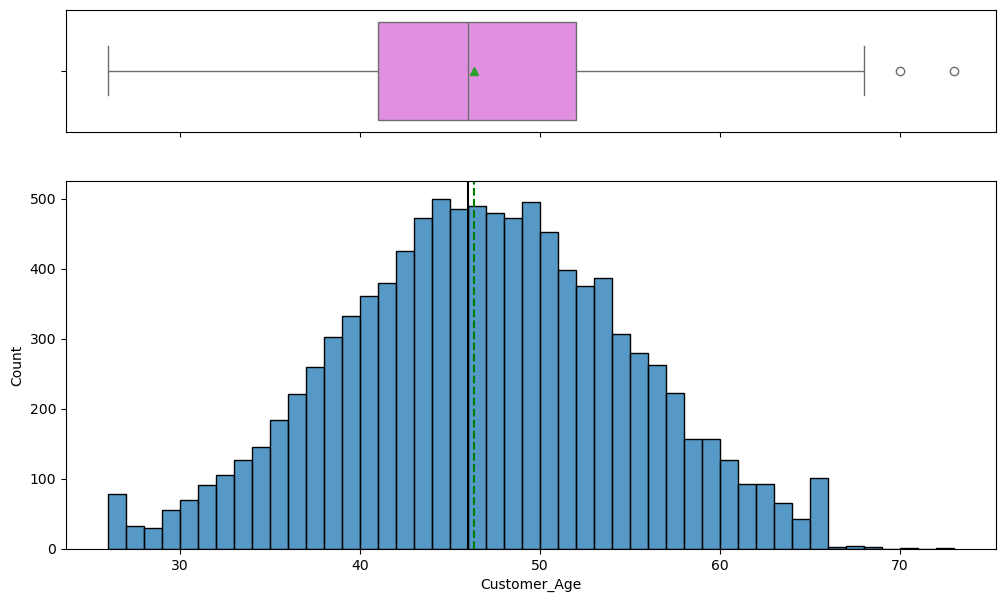

In [36]:
histogram_boxplot(df, 'Customer_Age')

* `Customer_Age` is normally distributed, with a median of 46 years.
* Not many outliers.

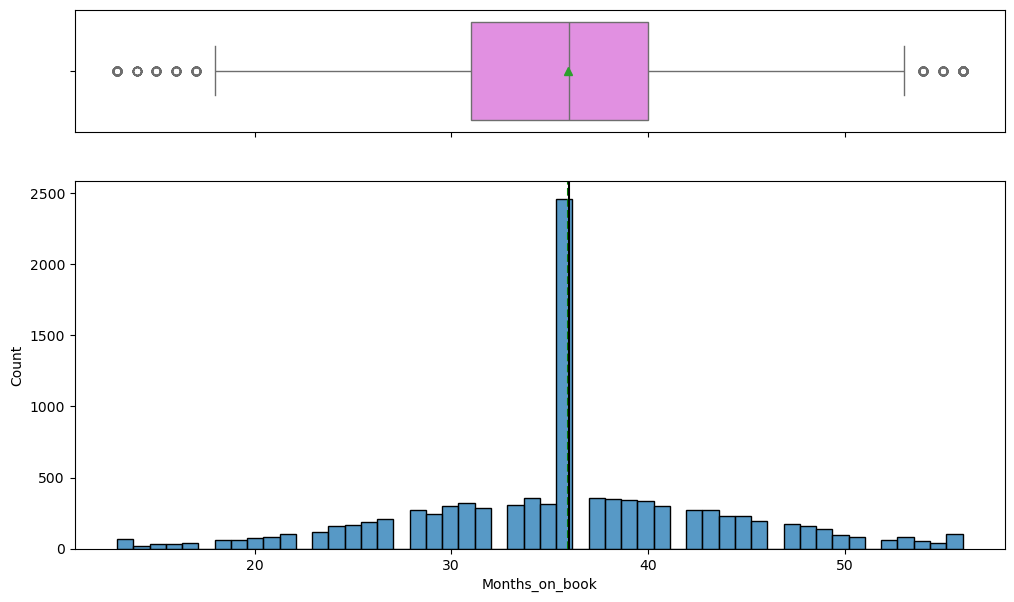

In [37]:
histogram_boxplot(df, 'Months_on_book')

In [38]:
df['Months_on_book'].value_counts(1).head(1) #If Months_on_book = 60 → Customer has been with the bank for 5 years

Months_on_book
36    0.243211
Name: proportion, dtype: float64

* `Months_on_book` is normally distributed with a very high frequency of the mode.
* 24% of the entries have 36 `Months_on_book`.
* Not many outliers.

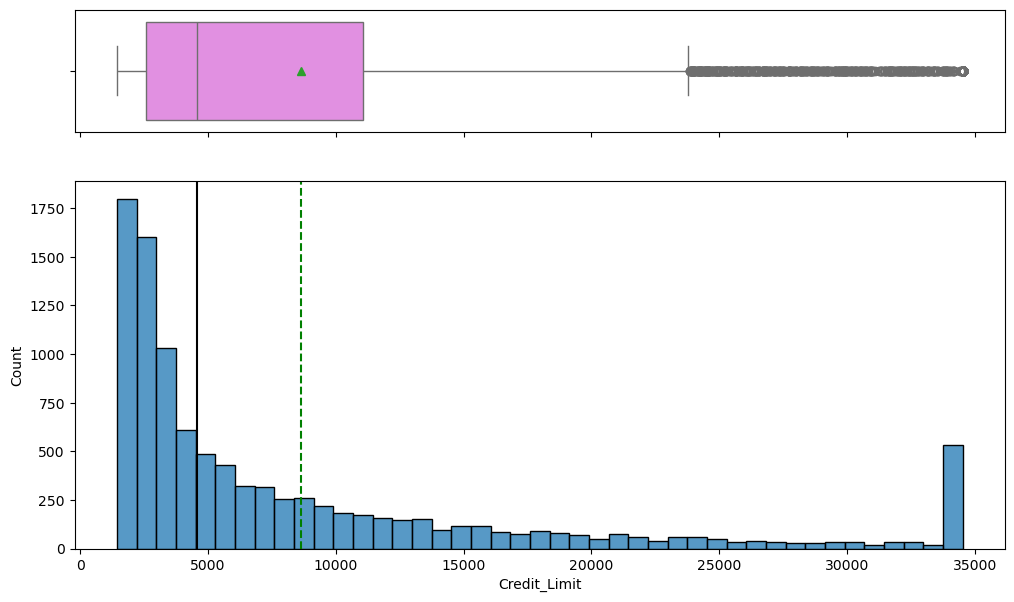

In [39]:
histogram_boxplot(df, 'Credit_Limit')

In [40]:
df['Credit_Limit'].min()

1438.3

* `Credit_Limit` is right skewed with many outliers. It seems like these values are just outside the range, but are actual credit limits.
* Minimum is 1438 dollars, since all customers have a credit line it is expected that the minimum is > 0.

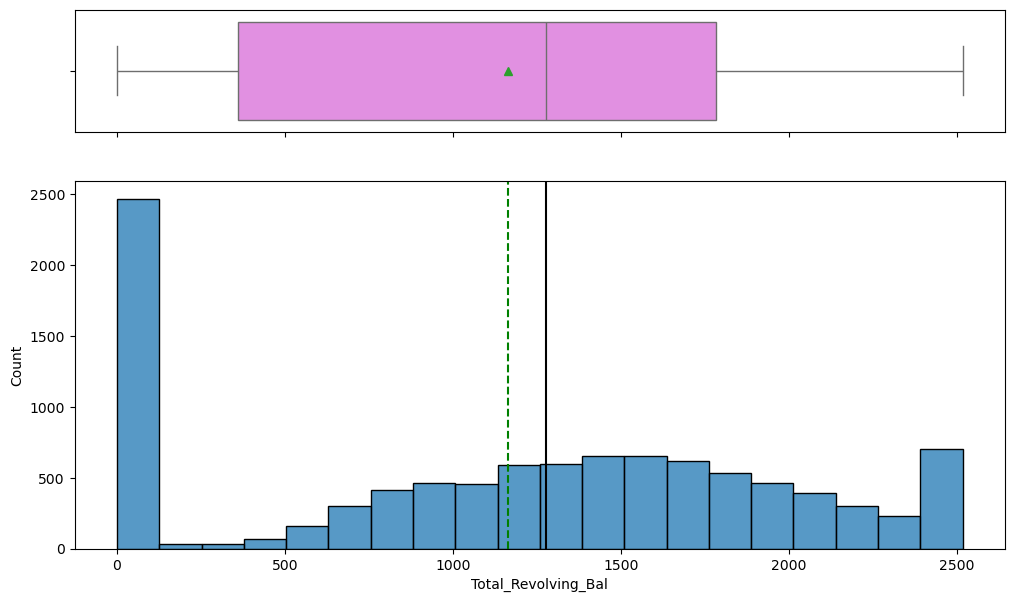

In [41]:
histogram_boxplot(df, 'Total_Revolving_Bal')

* Min `Total_Revolving_bal` is 0, indicating some customers pay off their balance every month.
* Median `Total_Revolving_bal` is around 1250 with the mean being slightly lower.
* The customers with 0 `Total_Revolving_bal` are very slightly left skewing the data.

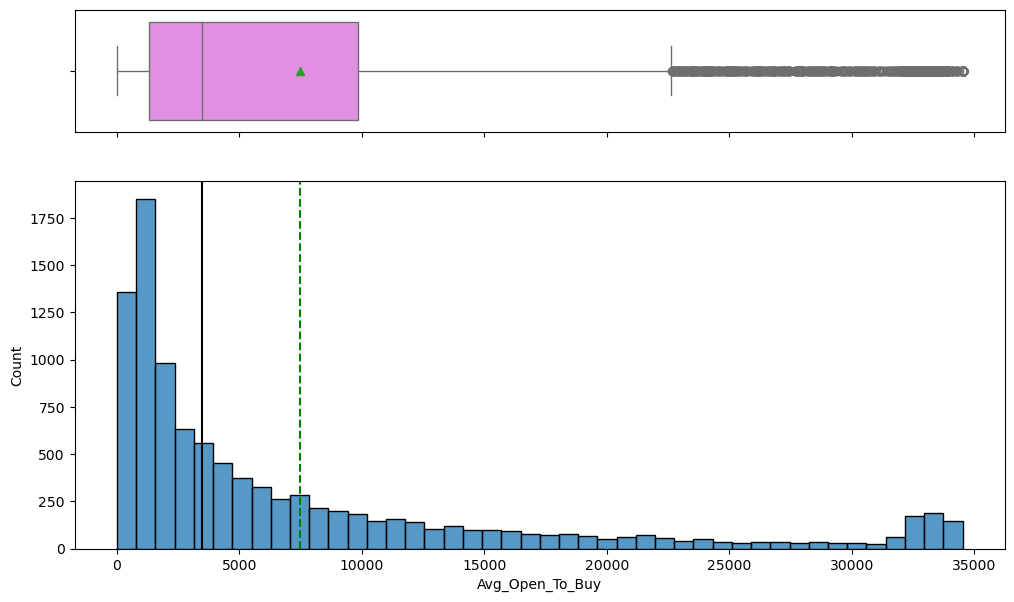

In [42]:
histogram_boxplot(df, 'Avg_Open_To_Buy')

* `Avg_Open_To_Buy` is right skewed as indicated by the mean being so much greater than the median.
* `Avg_Open_To_Buy` has a range of nearly 35,000.
* `Avg_Open_To_Buy` has so many outliers it seems that they cant possibly be all outliers.

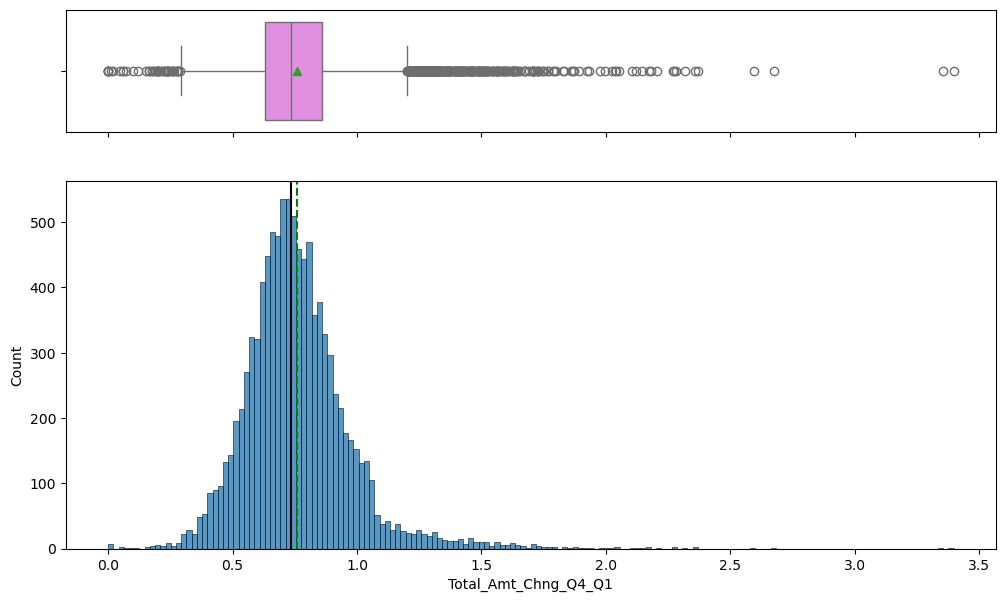

In [43]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1')

* `Total_Amt_Chng_Q4_Q1` is normally distributed with many outliers and centered around 0.6.
* It is unlikely that this many outliers are actually outliers.

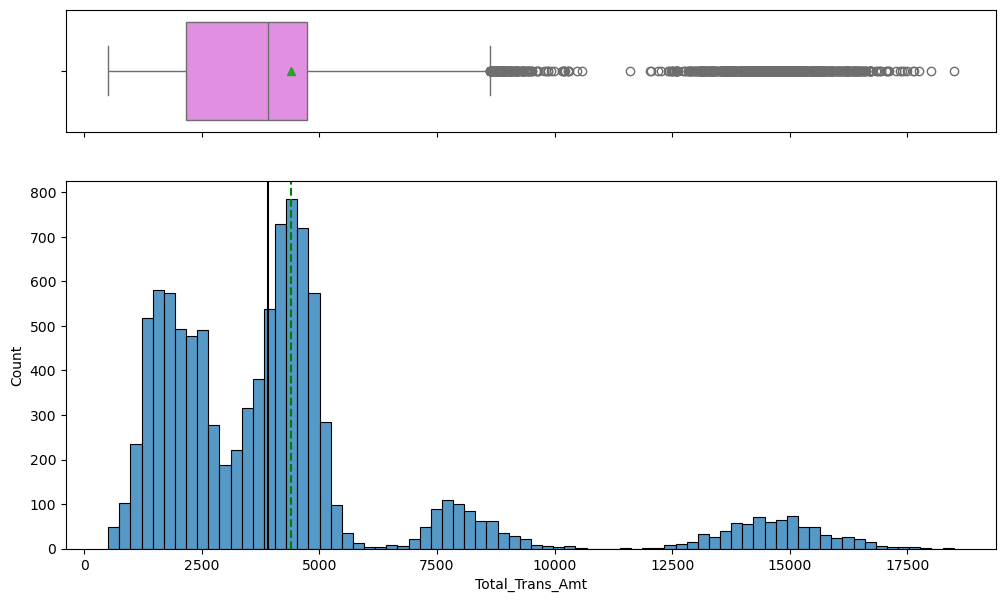

In [44]:
histogram_boxplot(df, 'Total_Trans_Amt')

* `Total_Trans_Amt` is right skewed with many outliers. It has a median of about 4000.
* No customer had a 0 dollar transaction amount, or all customers used their card.

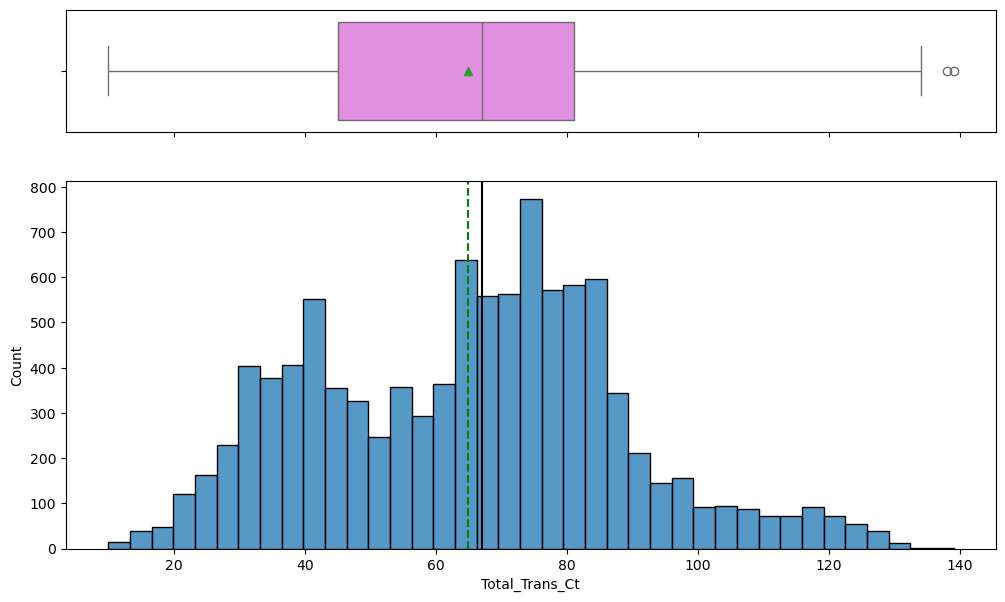

In [45]:
histogram_boxplot(df, 'Total_Trans_Ct')

* `Total_Trans_Ct` is pretty normally distributed with almost a median equal to the mean.
* It does not have many outliers.

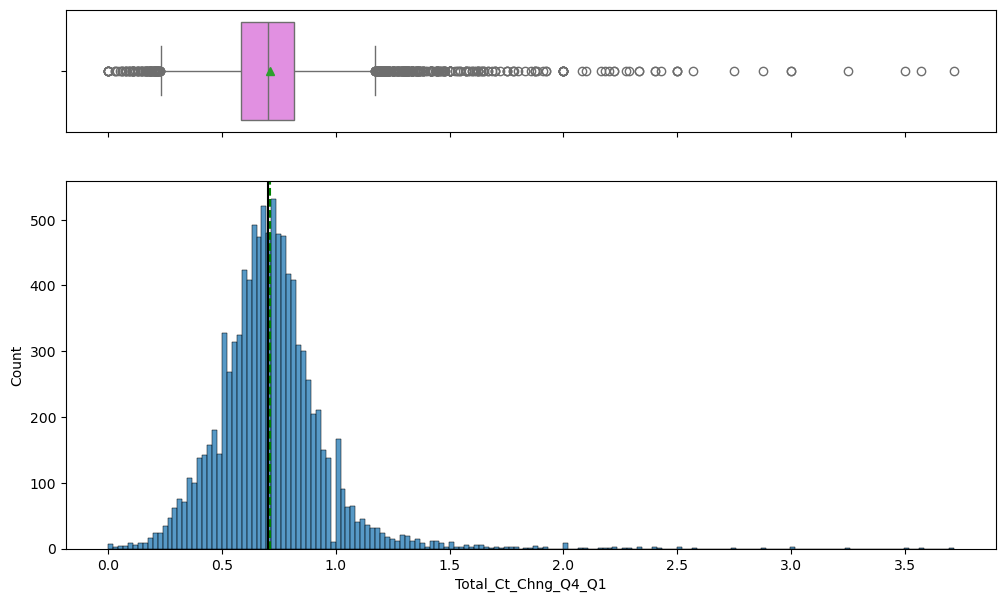

In [46]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1')

* `Total_Ct_Chng_Q4_Q1` is normally distributed and centered around 0.6.
* The median and mean are almost identical and many outliers are present.

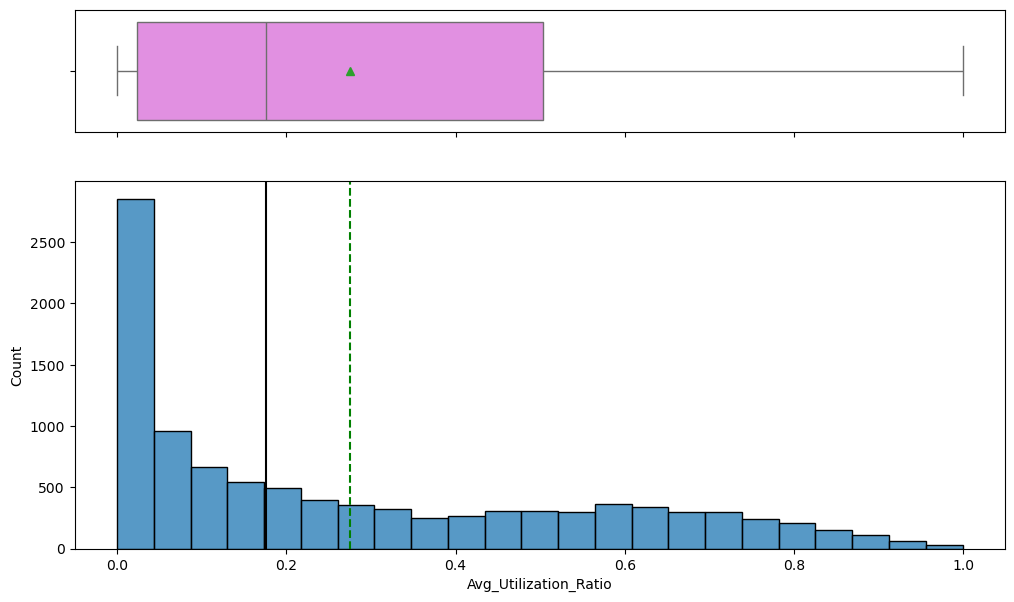

In [47]:
histogram_boxplot(df, 'Avg_Utilization_Ratio')

* `Avg_Utilization_Ratio` is right skewed with no outlier. The range is 1 because this is a utilization ratio from 0 to 100 percent.

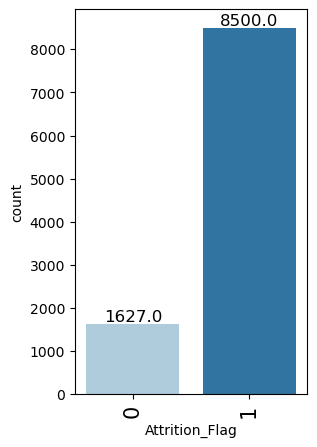

In [48]:
labeled_barplot(df, 'Attrition_Flag')

* 83.9% of all customers are existing customers.
* This is the target variable.

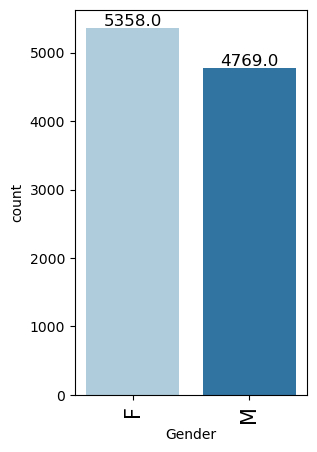

In [49]:
labeled_barplot(df, 'Gender')

* 52.9% of customers are female.

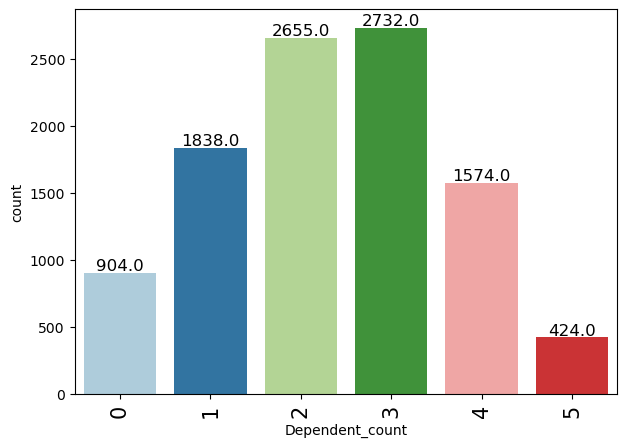

In [50]:
labeled_barplot(df, 'Dependent_count')

In [51]:
# Getting percentages of values
df['Dependent_count'].value_counts(1)

Dependent_count
3    0.269774
2    0.262170
1    0.181495
4    0.155426
0    0.089266
5    0.041868
Name: proportion, dtype: float64

* 26.9% of customers have 3 dependents.
* 26.2% of customers have 2 dependents.
* 18% of customers have 1 dependent.
* 15% of customers have 4 dependents.

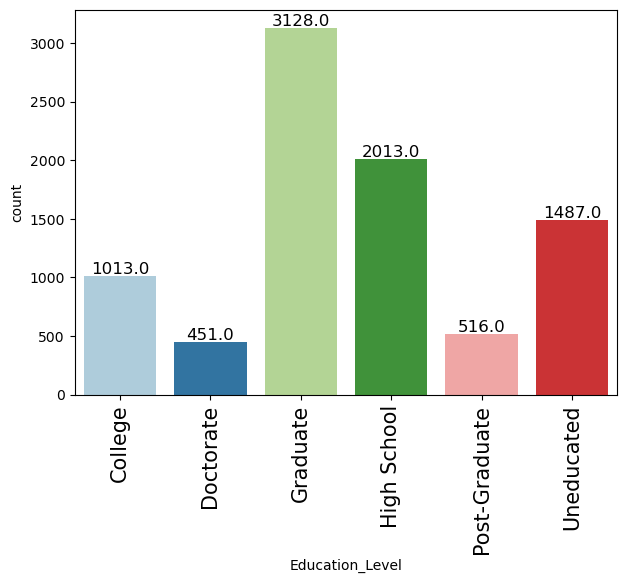

In [52]:
labeled_barplot(df, 'Education_Level')

In [53]:
# Getting percentages of values
df['Education_Level'].value_counts(1)

Education_Level
Graduate         0.363383
High School      0.233852
Uneducated       0.172746
College          0.117681
Post-Graduate    0.059944
Doctorate        0.052393
Name: proportion, dtype: float64

* 36% of customers have a graduate degree.
* 23% of customers have a high school diploma.
* 17% of customers are uneducated.

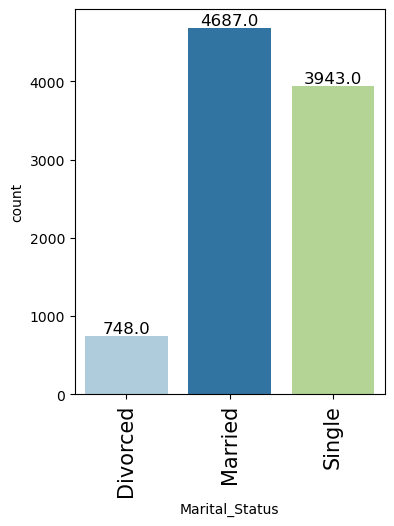

In [54]:
labeled_barplot(df, 'Marital_Status')

In [55]:
# Getting percentages of values
df['Marital_Status'].value_counts(1)

Marital_Status
Married     0.499787
Single      0.420452
Divorced    0.079761
Name: proportion, dtype: float64

* 49% of customers are married.
* 42% of customers are single.
* 7% of customers are divorced.

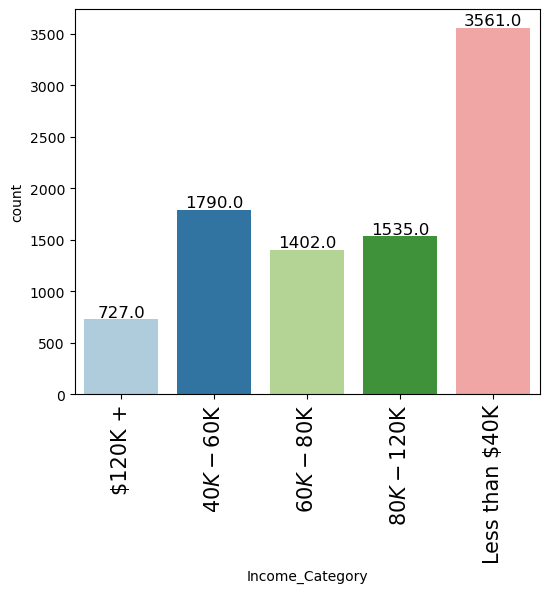

In [56]:
labeled_barplot(df, 'Income_Category')

In [57]:
# Getting percentages of values
df['Income_Category'].value_counts(1)

Income_Category
Less than $40K    0.395008
$40K - $60K       0.198558
$80K - $120K      0.170272
$60K - $80K       0.155519
$120K +           0.080643
Name: proportion, dtype: float64

* 39% of customers make less than 40k.
* 19% of customers make between 40k - 60k.
* 17% of customers make between 80k - 120k.

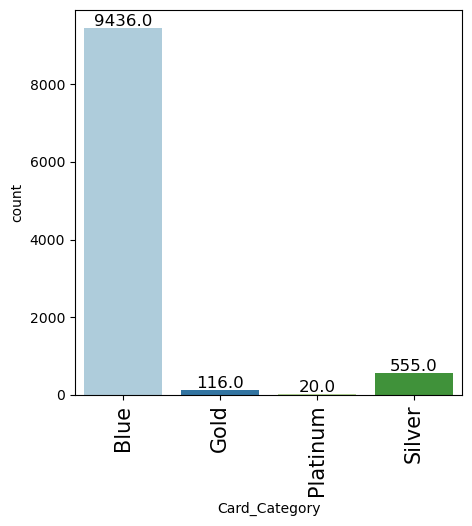

In [58]:
labeled_barplot(df, 'Card_Category')

In [59]:
# Getting percentages of values
df['Card_Category'].value_counts(1)

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: proportion, dtype: float64

* 93% of customers have a Blue card.
* 5% of customers have a Silver card.

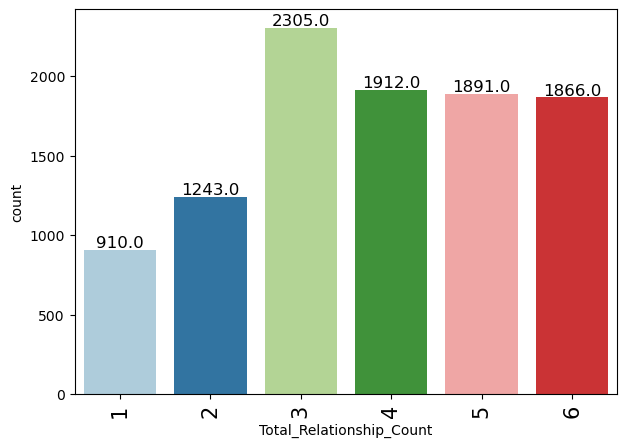

In [60]:
labeled_barplot(df, 'Total_Relationship_Count')

In [61]:
# Getting percentages of values
df['Total_Relationship_Count'].value_counts(1)

Total_Relationship_Count
3    0.227609
4    0.188802
5    0.186729
6    0.184260
2    0.122741
1    0.089859
Name: proportion, dtype: float64

* 22.8% of customers have 3 products.
* 18.9% of customers have 4 products.
* 18.7% of customers have 5 products.
* 18.4% of customers have 6 products.

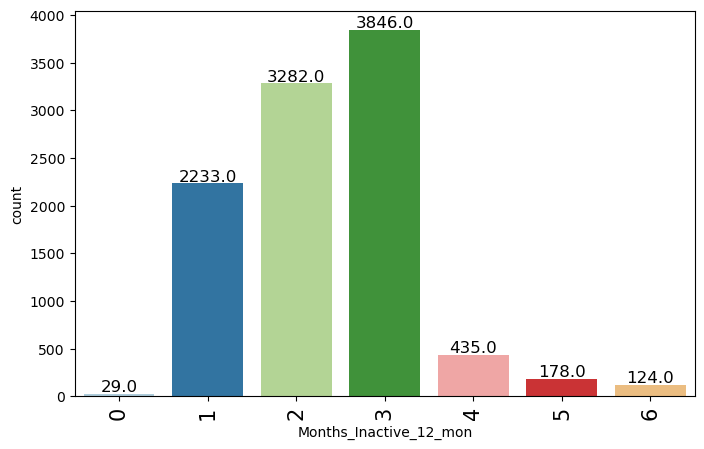

In [62]:
labeled_barplot(df, 'Months_Inactive_12_mon')

In [63]:
# Getting percentages of values
df['Months_Inactive_12_mon'].value_counts(1)

Months_Inactive_12_mon
3    0.379777
2    0.324084
1    0.220500
4    0.042954
5    0.017577
6    0.012244
0    0.002864
Name: proportion, dtype: float64

* 38% of customers have 3 months inactive.
* 32% of customers have 2 months inactive.
* 22% of customers have 1 months inactive.

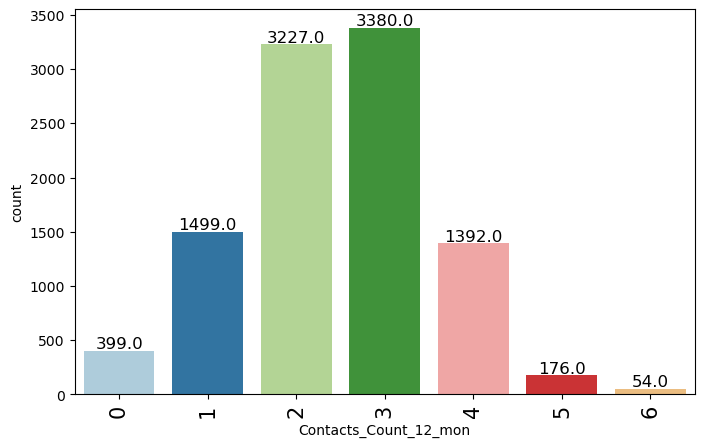

In [64]:
labeled_barplot(df, 'Contacts_Count_12_mon')

In [65]:
# Getting percentages of values
df['Contacts_Count_12_mon'].value_counts(1)

Contacts_Count_12_mon
3    0.333761
2    0.318653
1    0.148020
4    0.137454
0    0.039400
5    0.017379
6    0.005332
Name: proportion, dtype: float64

* 33% of customers have been contacted 3 times in the last 12 months.
* 31% of customers have been contacted 2 times in the last 12 months.
* 14% of customers have been contacted 1 times in the last 12 months.

### Multivariate Analysis

#### Most important indicators

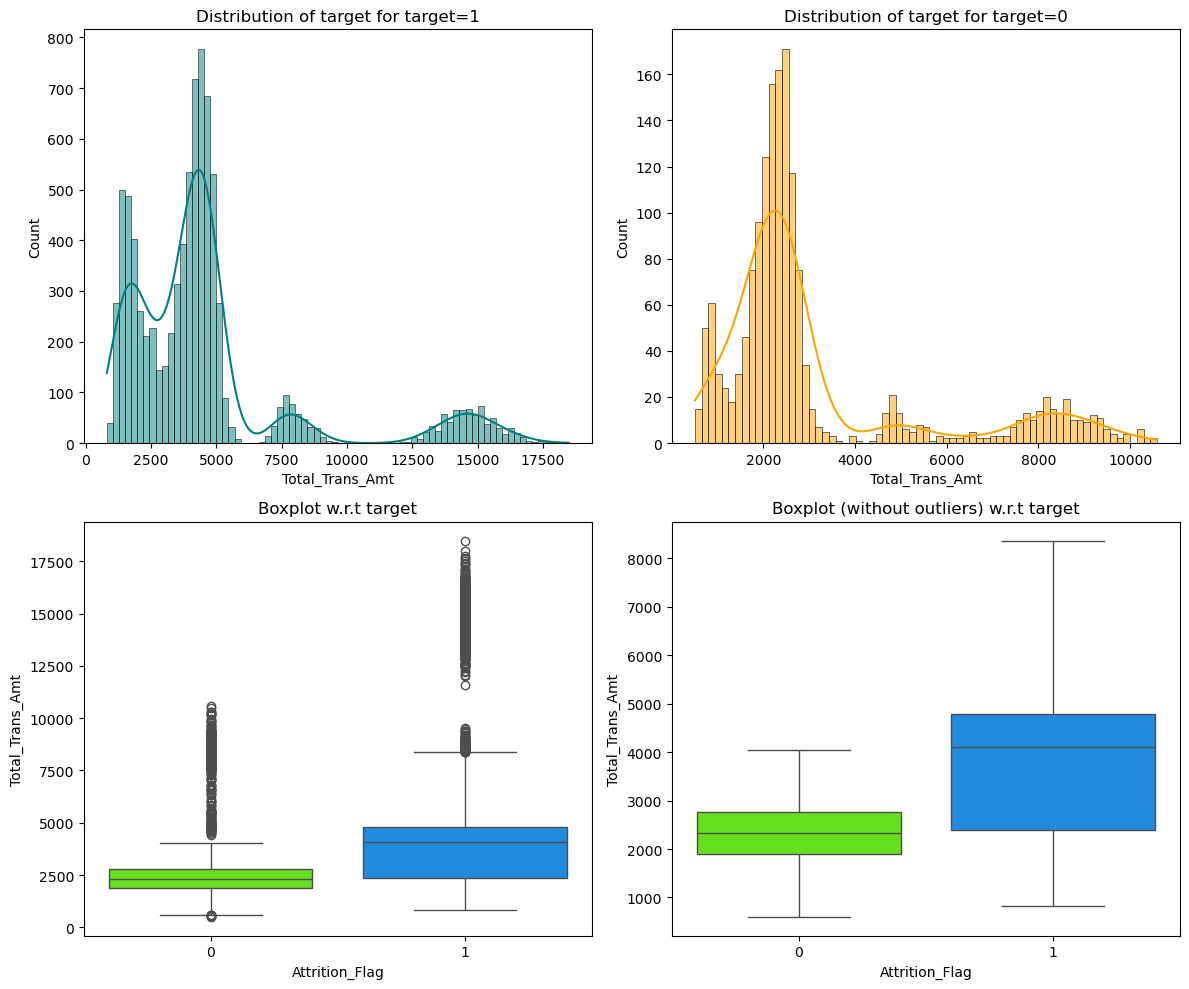

In [66]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

* The distribution of `Total_Trans_Amt` looks similar for both existing and attrited customers.
* The median `Total_Trans_Amt` for attrited customers is 2500, while the median for existing customers is closer to 4000.
* The IQR of `Total_Trans_Amt` for attrited customers is much smaller than that of existing customers.
* The maximum `Total_Trans_Amt` for attrited customers is about half as much compared to exsiting customers.

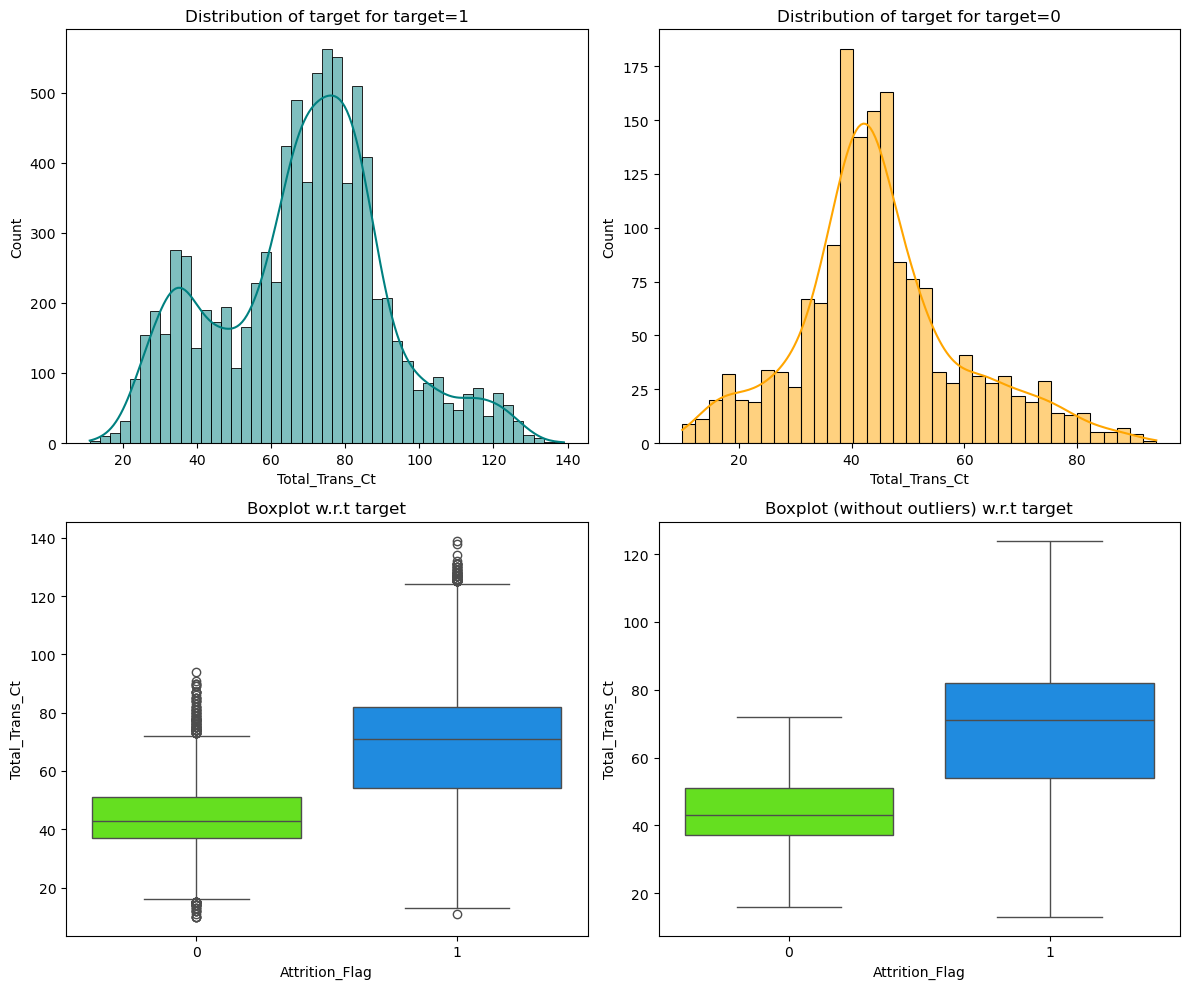

In [67]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

* The distribution of `Total_Trans_Ct` is more normally distributed for attrited customers
* The distribution of `Total_Trans_Ct` for attrited customers is centered around 50 while for existing customers the center is around 70.
* Attrited customers have a much lower median and max `Total_Trans_Ct` than existing customers.

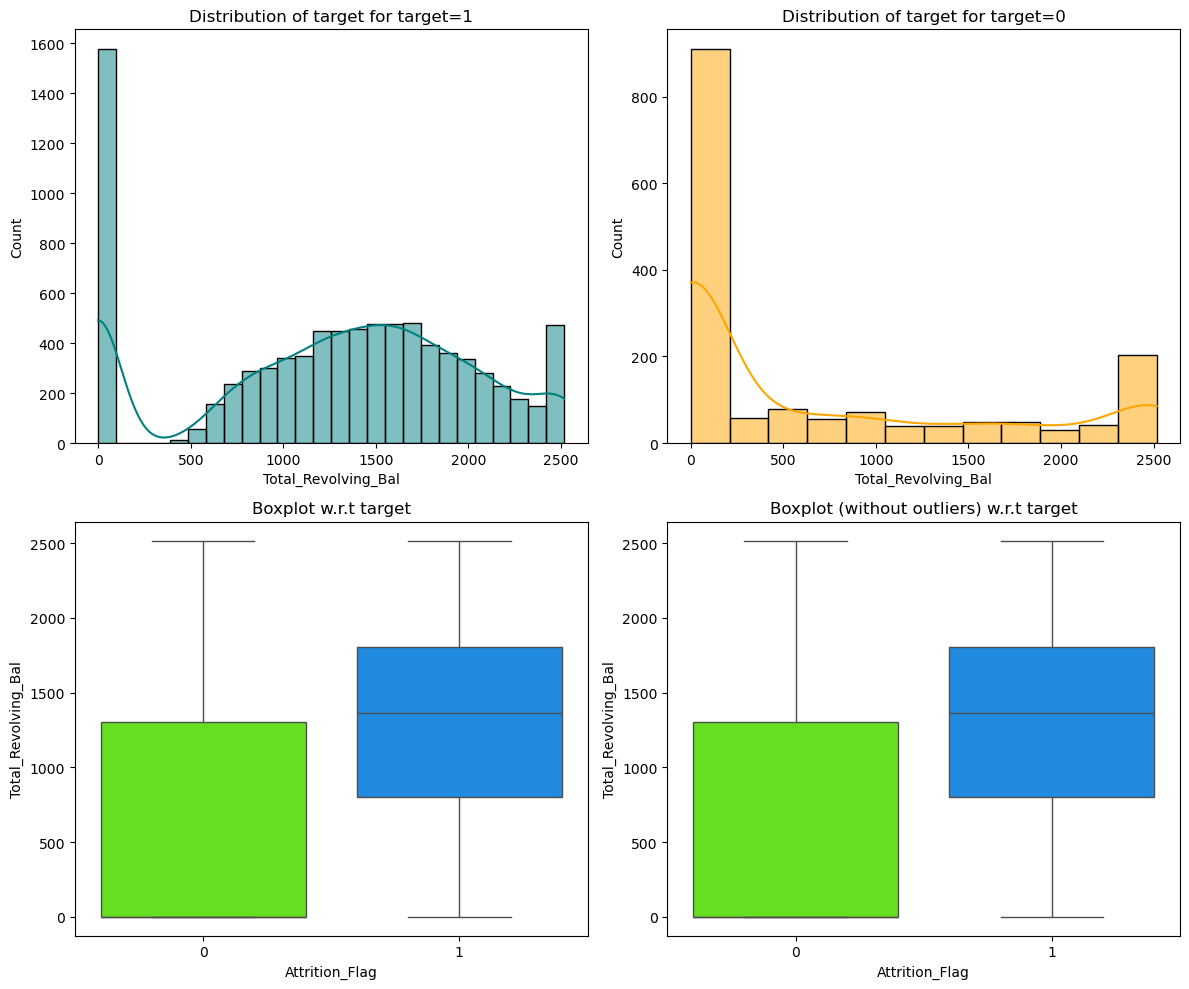

In [68]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* `Total_Revolving_Bal` has similar distributions for both attrited and existing customers, but the existing customers have a bulge in the center.
* Attrited customers have peaks at both the min and max of the distribution.
* The median `Total_Revolving_Bal` for existing customers is higher than that of more than 75% of attrited customers.

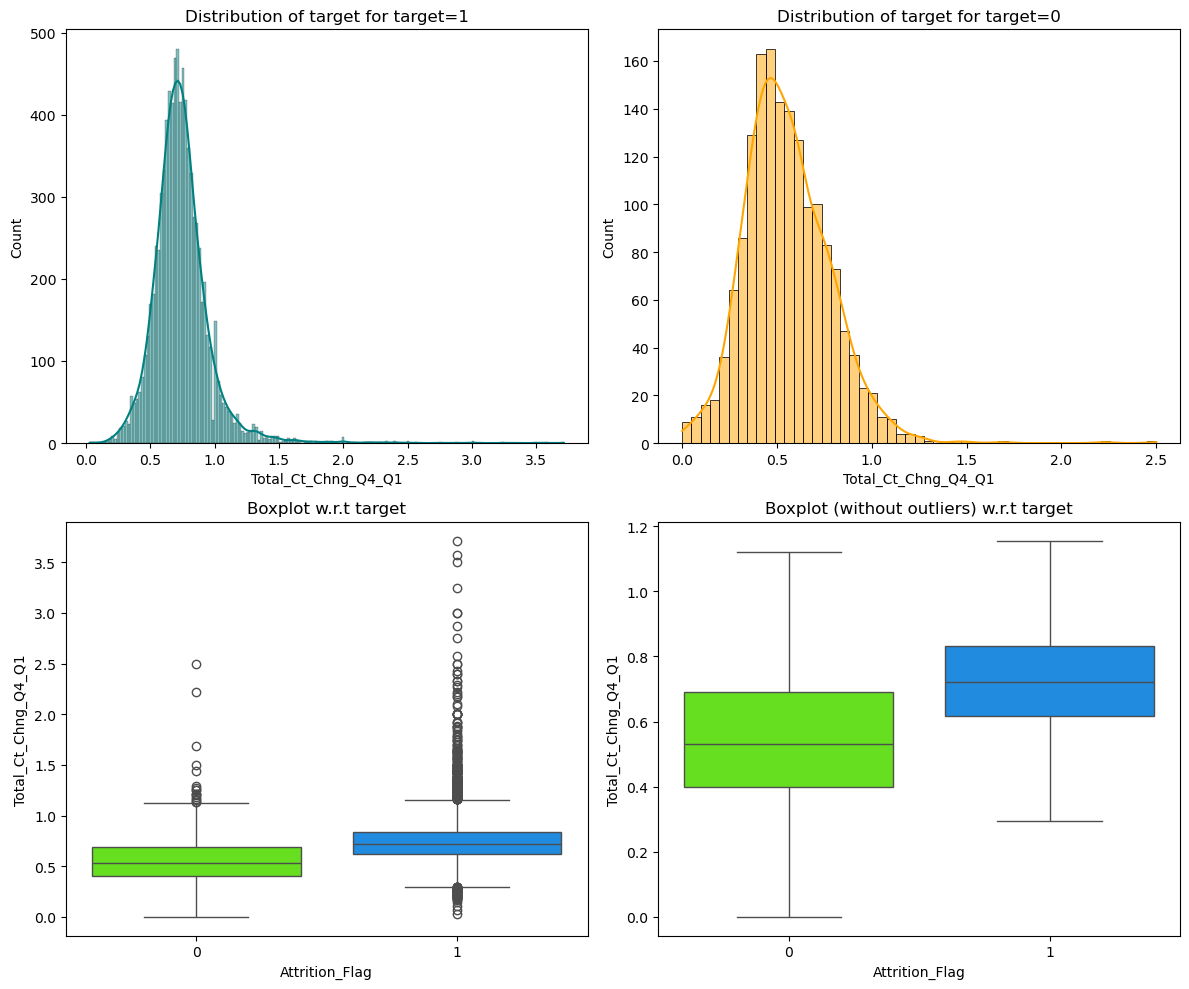

In [69]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Distributions of `Total_Ct_Chng_Q4_Q1` for both attrited and existing customers are normally distributed.
* Distribution of `Total_Ct_Chng_Q4_Q1` is centered around 0.5 for attrited customers.
* Distribution of `Total_Ct_Chng_Q4_Q1` is centered around 0.7 for existing customers.
* Median of `Total_Ct_Chng_Q4_Q1` for existing customers is greater than that of 75% of attrited customers.
* Max of `Total_Ct_Chng_Q4_Q1` for existing customers similar to attrited customers.
* Min of `Total_Ct_Chng_Q4_Q1` for existing customer much greater than that of attrited customers.

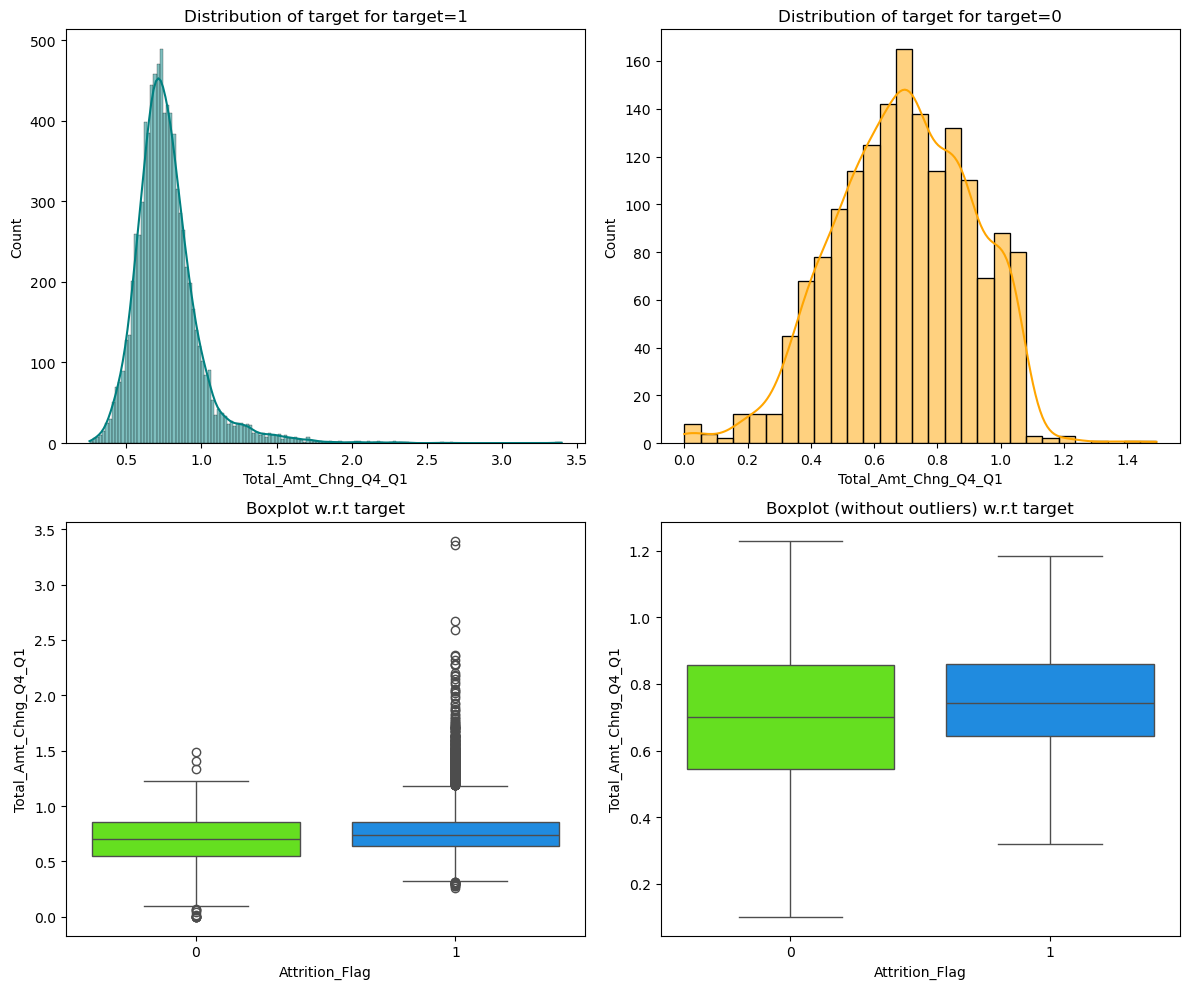

In [70]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

* `Total_Amt_Chng_Q4_Q1` has similar distributions for both attrited customers.
* Median is higher for existing customers.
* Min is much lower for attrited customers.

#### Less important indicators

In [71]:
# Created a correlation matrix to show any correlations between non-categorical columns.
# Values of 1 are highly positively correlated, values of -1 are highly negatively correlated.
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

ValueError: could not convert string to float: '$60K - $80K'

<Figure size 1500x700 with 0 Axes>

* `Avg_Open_to_Buy` and `Credit_Limit` are completely positively correlated by necessity. As a customer's credit limit goes up, their open to buy also increases.
* `Total_Trans_Amt` and `Total_Trans_Ct` are very highly positively correlated. This makes sense because the more transations a customer makes, the more the customer will spend.
* `Customer_Age` and `Months_on_book` are highly positively correlated. This makes sense because as customers age, their time with the bank increases.
* `Total_Revolving balance` and `Avg_Utilization_Ratio` is positively correlated. This makes sense because if a customer has a high utilization, they will likely have a higher revolving balance.
* `Avg_Open_To_Buy` and `Avg_Utilization_Ratio` are negatively correlated. This is because the higher a customers utilization is, the less their amount open to buy will be.
*`Credit_Limit` and `Avg_Utilization_Ratio` are negatively correlated. This is because customers with a higher credit limit tend to have a lower utilization.

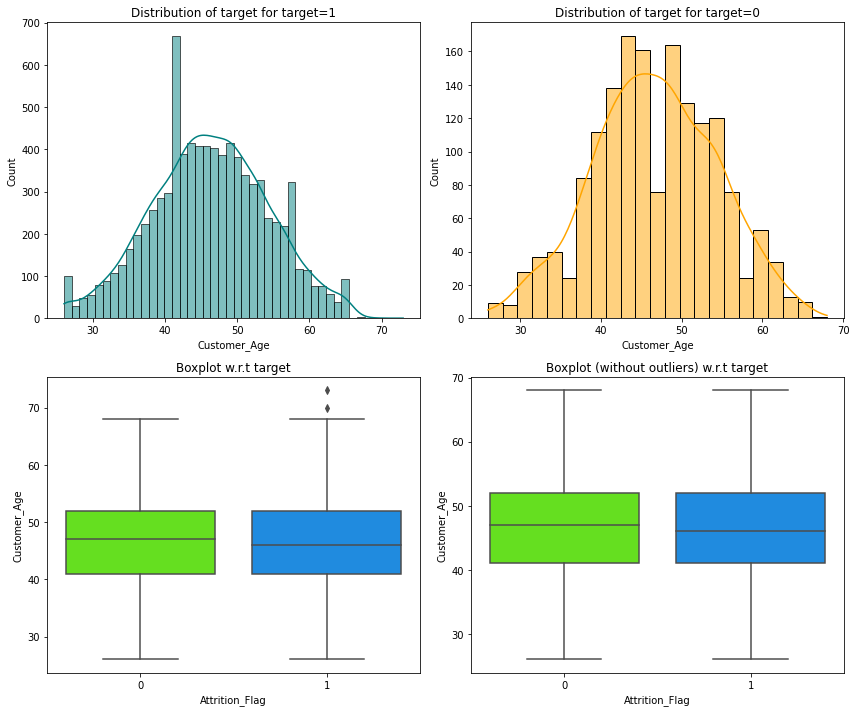

In [ ]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

* `Customer_Age` appears to be nearly identically distributed for existing customer and attrited customers.

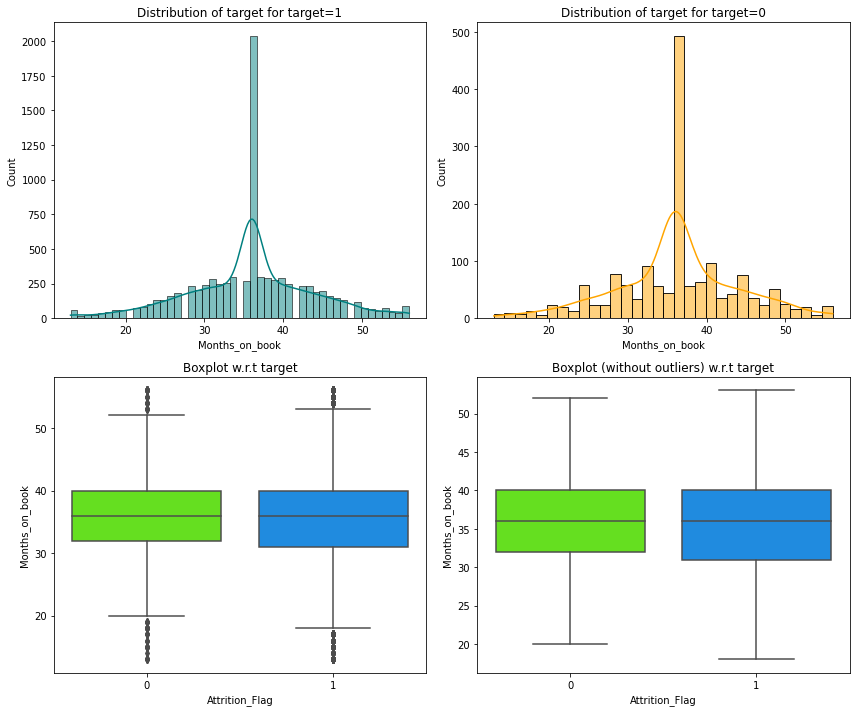

In [ ]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

* `Months_on_book` appears to be nearly identically distributed for existing customer and attrited customers.

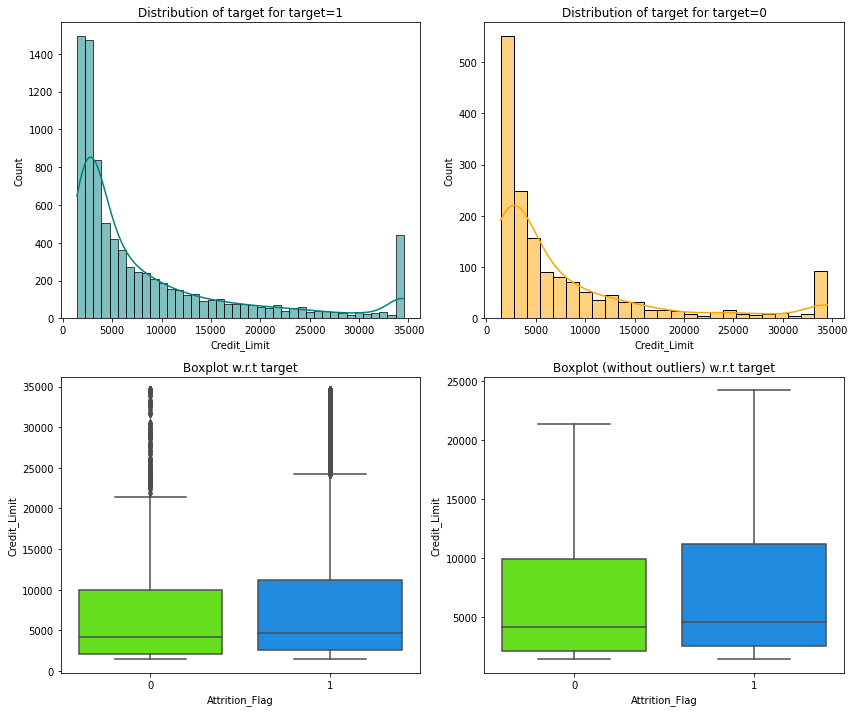

In [ ]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

* `Credit_Limit` appears to be nearly identically distributed for existing customer and attrited customers.

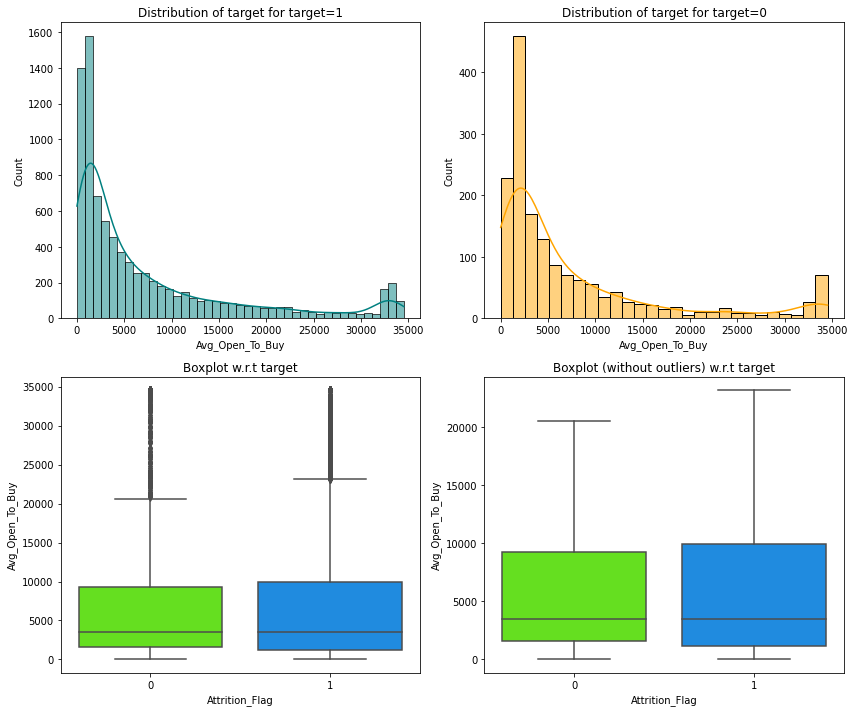

In [ ]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

* `Avg_Open_To_Buy` appears to be nearly identically distributed for existing customer and attrited customers.

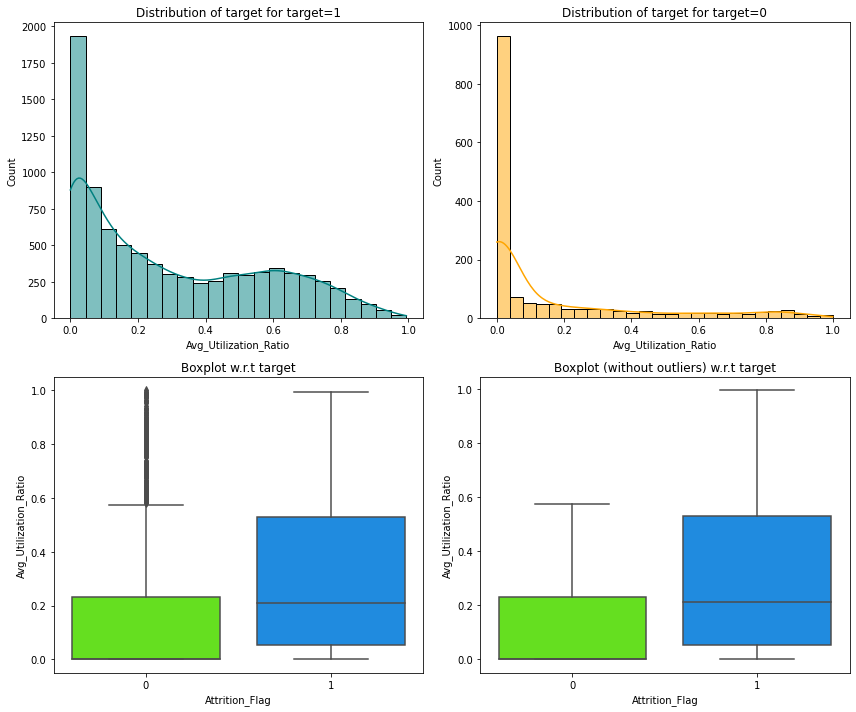

In [ ]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

* The median `Avg_Utilization_Ratio` for attrited customers is 20%.
* The median `Avg_Utilization_Ratio` for existing customers is 0%.
* Close to 75% of existing customers have an `Avg_Utilization_Ratio` less than the median of attrited customers.

Attrition_Flag     0     1    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


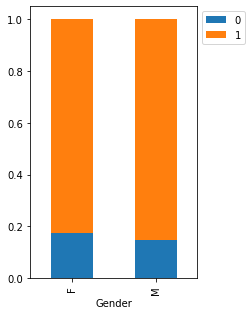

In [ ]:
stacked_barplot(df, 'Gender', 'Attrition_Flag')

* From this stacked barplot, `Gender` does not appear to affect attrition.

Attrition_Flag      0     1    All
Dependent_count                   
All              1627  8500  10127
3                 482  2250   2732
2                 417  2238   2655
1                 269  1569   1838
4                 260  1314   1574
0                 135   769    904
5                  64   360    424
------------------------------------------------------------------------------------------------------------------------


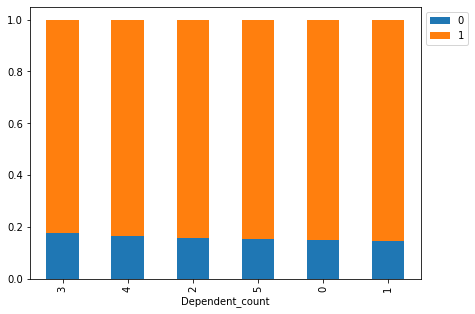

In [ ]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

* From this stacked barplot, `Dependent_Count` does not appear to affect attrition.

Attrition_Flag      0     1   All
Education_Level                  
All              1371  7237  8608
Graduate          487  2641  3128
High School       306  1707  2013
Uneducated        237  1250  1487
College           154   859  1013
Doctorate          95   356   451
Post-Graduate      92   424   516
------------------------------------------------------------------------------------------------------------------------


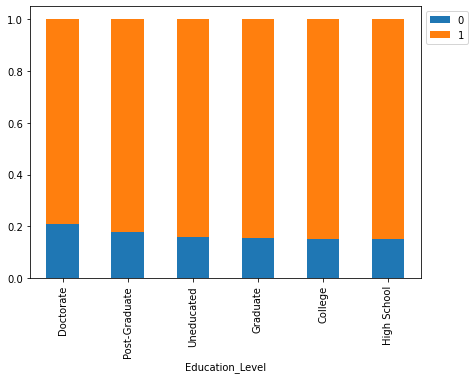

In [ ]:
stacked_barplot(df, 'Education_Level', 'Attrition_Flag')

* From this stacked barplot, `Education_Level` does not appear to significantly affect attrition.

Attrition_Flag     0     1   All
Marital_Status                  
All             1498  7880  9378
Married          709  3978  4687
Single           668  3275  3943
Divorced         121   627   748
------------------------------------------------------------------------------------------------------------------------


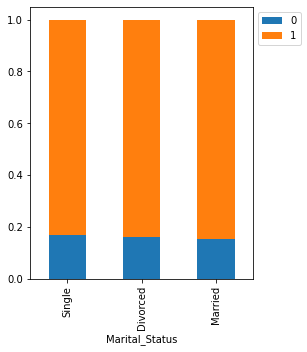

In [ ]:
stacked_barplot(df, 'Marital_Status', 'Attrition_Flag')

* From this stacked barplot, `Marital_Status` does not appear to affect attrition.

Attrition_Flag      0     1   All
Income_Category                  
All              1440  7575  9015
Less than $40K    612  2949  3561
$40K - $60K       271  1519  1790
$80K - $120K      242  1293  1535
$60K - $80K       189  1213  1402
$120K +           126   601   727
------------------------------------------------------------------------------------------------------------------------


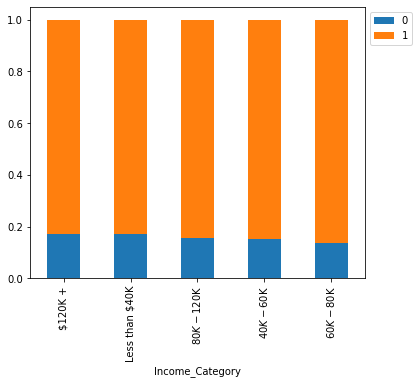

In [ ]:
stacked_barplot(df, 'Income_Category', 'Attrition_Flag')

* From this stacked barplot, `Income_Category` does not appear to significantly affect attrition.

Attrition_Flag     0     1    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


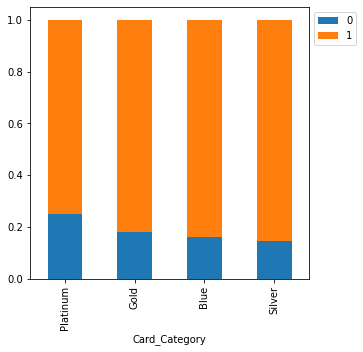

In [ ]:
stacked_barplot(df, 'Card_Category', 'Attrition_Flag')

* Slighly less customers with a Platinum card attrit, but not by a significant amount.

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------------------------------------------------------------------------------------------------


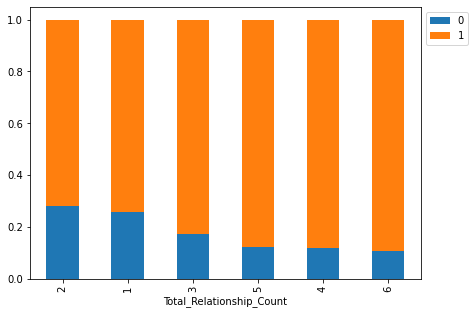

In [ ]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

* Customers that have 1 or 2 products with the bank attrit the most, followed by customers who have 3 products.
* Customers that have either 4, 5, or 6 products with the bank attrit at nearly the same rates.

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------------------------------------------------------------------------------------------------


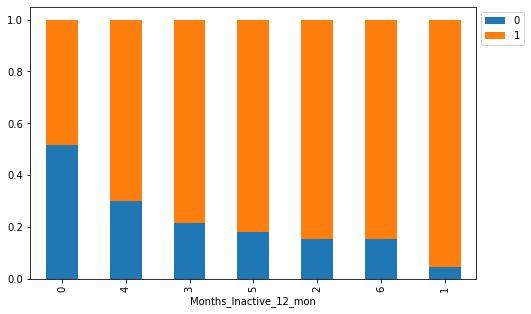

In [ ]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

* From this stacked bar plot it can be observed that `Months_Inactice_12_mon` does have some affect on attrition, but a clear pattern is not obvious.

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    1627  8500  10127
3                       681  2699   3380
2                       403  2824   3227
4                       315  1077   1392
1                       108  1391   1499
5                        59   117    176
6                        54     0     54
0                         7   392    399
------------------------------------------------------------------------------------------------------------------------


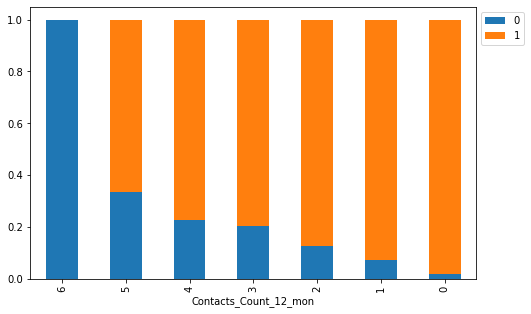

In [ ]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

* 0 customers with 6 contacts in the last 12 months attrited.
* Customers with less contacts in the last 12 months attrited more often.

## Data Pre-processing

### Outlier Detection

In [159]:
# Code to be used checking for outliers.
Q1 = df.select_dtypes(include=['number']).quantile(0.25)# The 25th percentile.
Q3 = df.select_dtypes(include=['number']).quantile(0.75) # The 75th percentile.
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
# Q1 = df.quantile(0.25)  
# Q3 = df.quantile(0.75)   

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [160]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Customer_Age                0.019749
Dependent_count             0.000000
Months_on_book              3.811593
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      3.268490
Contacts_Count_12_mon       6.211119
Credit_Limit                9.716599
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             9.509233
Total_Amt_Chng_Q4_Q1        3.910339
Total_Trans_Amt             8.847635
Total_Trans_Ct              0.019749
Total_Ct_Chng_Q4_Q1         3.890590
Avg_Utilization_Ratio       0.000000
dtype: float64

* It was determined not necessary to treat any outliers.
* Although some values are outside the outlier range, these values are determined as significant for analysis.

### Train-test split

In [161]:
# Creating the independent variable data frame.
X = df.drop('Attrition_Flag', axis=1)
# Creating the dependent variable data frame.
y = df['Attrition_Flag']

* Split data into independent and dependent variables.

In [162]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [163]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1, stratify=y_temp)

In [164]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (5063, 19)
Shape of Validation Set (3038, 19)
Shape of Test Set :  (2026, 19)
****************************************
Percentage of classes in training set:
Attrition_Flag
1    0.839423
0    0.160577
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Attrition_Flag
1    0.839368
0    0.160632
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Attrition_Flag
1    0.839092
0    0.160908
Name: proportion, dtype: float64
****************************************


* Split data into training, validation, and test sets.
* Models will be trained on training data, and evaluated on validation data.
* The best models will be tuned and finally evaluated on the test data.

### Missing value imputation




In [165]:
# Printing the number of na values in each data frame.
# The columns with na values are aleady known from previous lines.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 1667
******************************
Number of X_val na values: 1031
******************************
Number of X_test na values: 682


* Observed how many Null values are present in the data sets.

In [167]:
# Creating an imputer to impute values by the mode.
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [144]:
# Creating list of column labels that need to be imputed.
col_impute = ['Education_Level', 'Income_Category', 'Marital_Status']

In [168]:
# Imputing X_train columns.
X_train[col_impute] = imp_mode.fit_transform(X_train[col_impute])
# Imputing X_val columns.
X_val[col_impute] = imp_mode.fit_transform(X_val[col_impute])
# Imputing X_test columns.
X_test[col_impute] = imp_mode.fit_transform(X_test[col_impute])

In [169]:
# Printing the number of na values in each data frame.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 0
******************************
Number of X_val na values: 0
******************************
Number of X_test na values: 0


* Removed Null values by imputing them with the mode of their column.


### Encoding Categorical Variables

In [170]:
# Dropping first of each encoded column to reduce data frame size.

# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

* Encoded categorical columns so they can be used in the models.
* Dropped 1 dummy variable column from each category as it is unnecessary to have all columns.

In [171]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (5063, 29)
Shape of X_val: (3038, 29)
Shape of X_test: (2026, 29)


* Observed shape of data sets.

In [172]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5063 entries, 5930 to 10034
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    5063 non-null   int64  
 1   Dependent_count                 5063 non-null   int64  
 2   Months_on_book                  5063 non-null   int64  
 3   Total_Relationship_Count        5063 non-null   int64  
 4   Months_Inactive_12_mon          5063 non-null   int64  
 5   Contacts_Count_12_mon           5063 non-null   int64  
 6   Credit_Limit                    5063 non-null   float64
 7   Total_Revolving_Bal             5063 non-null   int64  
 8   Avg_Open_To_Buy                 5063 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            5063 non-null   float64
 10  Total_Trans_Amt                 5063 non-null   int64  
 11  Total_Trans_Ct                  5063 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             506

* Observed data types of training set.

In [173]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 9952 to 1898
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    3038 non-null   int64  
 1   Dependent_count                 3038 non-null   int64  
 2   Months_on_book                  3038 non-null   int64  
 3   Total_Relationship_Count        3038 non-null   int64  
 4   Months_Inactive_12_mon          3038 non-null   int64  
 5   Contacts_Count_12_mon           3038 non-null   int64  
 6   Credit_Limit                    3038 non-null   float64
 7   Total_Revolving_Bal             3038 non-null   int64  
 8   Avg_Open_To_Buy                 3038 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            3038 non-null   float64
 10  Total_Trans_Amt                 3038 non-null   int64  
 11  Total_Trans_Ct                  3038 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             3038

* Observed data types of validation set.

In [174]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 3043 to 215
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Months_Inactive_12_mon          2026 non-null   int64  
 5   Contacts_Count_12_mon           2026 non-null   int64  
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   int64  
 8   Avg_Open_To_Buy                 2026 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 10  Total_Trans_Amt                 2026 non-null   int64  
 11  Total_Trans_Ct                  2026 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             2026 

* Observed data types of test set.

* The data is prepared for model building.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True Positives (TP) are existing customers correctly predicted by the model.
- True Negatives (TN) are atritioned customers correctly predicted by the model.
- False Positives (FP) are atritioned customers incorrectly predicted as an existing customer by the model.
- False Negatives (FN) are existing customers incorrectly predicted as an atritioned customer by the model.



**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of customer attritions are predicted correctly by the model.
* We would want Precision to be maximized as greater the Precision, the higher the chances of minimizing False Positives.
* We want to minimize False Positives because if a model predicts that a customer will not attrit, but they do, the customer is lost.

In [175]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn.
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # To compute Accuracy.
    recall = recall_score(target, pred)  # To compute Recall.
    precision = precision_score(target, pred)  # To compute Precision.
    f1 = f1_score(target, pred)  # To compute F1-score.

    # Creating a dataframe of metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [176]:
# Defining a function to create a confusion matrix to check TP, FP, TN, adn FN values.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables.
    y_pred = model.predict(predictors)
    # Creating the confusion matrix.
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix.
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [177]:
models = []  # Empty list to store all the models.

# Appending models into the list.
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = precision_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9974135904067717
Random forest: 1.0
AdaBoost: 0.9716080986734932
GradientBoost: 0.9827786828019549
XGBoost: 1.0

Validation Performance:

Bagging: 0.9675907848496681
Random forest: 0.9563898369359121
AdaBoost: 0.9640232108317215
GradientBoost: 0.9670371789957838
XGBoost: 0.9748159628051143


* Observed the precision scores of 5 models that were fit on orginal training data.

### Model Building with Oversampled data


In [178]:
# Synthetic Minority Over Sampling Technique.
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

* Oversampled the training data to fit next models with.

In [179]:
models_over = []  # Empty list to store all the models.

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = precision_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9995274102079396
Random forest: 1.0
AdaBoost: 0.9673731840914503
GradientBoost: 0.981301775147929
XGBoost: 1.0

Validation Performance:

Bagging: 0.9746172441579372
Random forest: 0.9702194357366771
AdaBoost: 0.9739895958383353
GradientBoost: 0.9747335175681011
XGBoost: 0.9808369182635901


* Observed the precision scores of 5 models that were fit on oversampled training data.

### Model Building with Undersampled data

In [180]:
# Random undersampler for under sampling the data.
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

* Undersampled the training data to fit the next models with.

In [181]:
models_un = []  # Empty list to store all the models.

# Appending models into the list.
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_un.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_un.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = precision_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9987593052109182
Random forest: 1.0
AdaBoost: 0.9650436953807741
GradientBoost: 0.9851851851851852
XGBoost: 1.0

Validation Performance:

Bagging: 0.9819587628865979
Random forest: 0.9886839899413243
AdaBoost: 0.9878304657994125
GradientBoost: 0.9892517569243489
XGBoost: 0.9860426929392446


* Observed the precision scores of 5 models that were fit on undersampled training data.

### HyperparameterTuning

* Chose 9 models for tuning, 3 from each training data category (original/oversampled/undersampled).
* Of each category, the 3 models selected were those with the highest Precision performance on the validation data.
* BaggingClassifier was not used due to long computational time.

#### Models fit on original Data

##### XGBoost (original training data)

In [182]:
# Defining the model.
XGB_org = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.   
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.971525521150788:


In [183]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_org_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.05,
    gamma=1)

# Fitting the model to the original training data.
XGB_org_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [184]:
 # Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.990717,0.996471,0.992501,0.994482


In [185]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_train_scores = model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

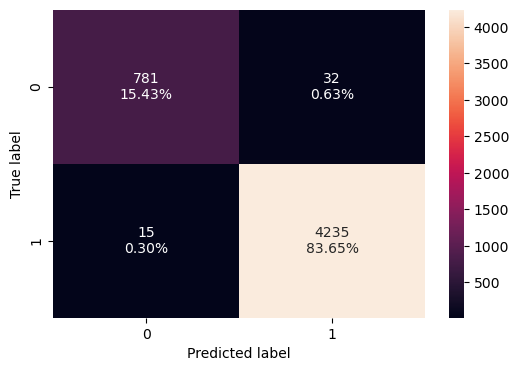

In [186]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(XGB_org_tuned, X_train, y_train)

In [187]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.960171,0.98549,0.967655,0.976491


In [188]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_val_scores = model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

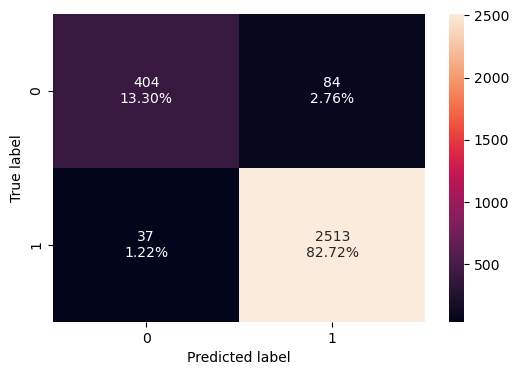

In [189]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_org_tuned, X_val, y_val)

##### Gradient Boost (original training data)

In [190]:
# Defining the model.
GBC_org = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9635312910330839:


In [191]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_org_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the original training data.
GBC_org_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [192]:
# Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(GBC_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [193]:
# Saving the tuned model's scores for later comparison.
GBC_org_tuned_train_scores = model_performance_classification_sklearn(GBC_org_tuned, X_train, y_train)

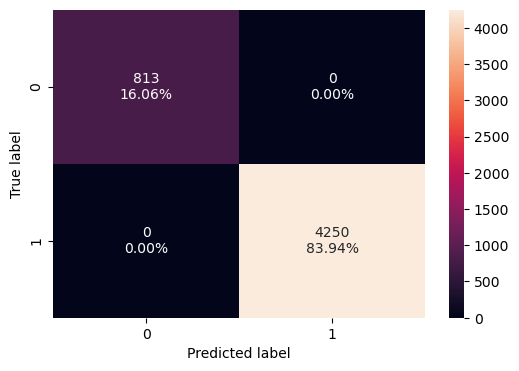

In [194]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(GBC_org_tuned, X_train, y_train)

In [195]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.938446,0.964706,0.962065,0.963384


In [196]:
# Saving the tuned model's scores for later comparison.
GBC_org_tuned_val_scores = model_performance_classification_sklearn(GBC_org_tuned, X_val, y_val)

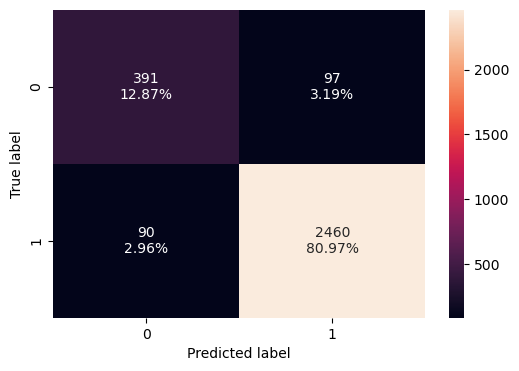

In [197]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_org_tuned, X_val, y_val)

##### AdaBoost (original training data)

In [198]:
# Defining the model.
Ada_org = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomizedSearchCV.
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(
    estimator=Ada_org,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV.
randomized_cv.fit(X_train, y_train)

# Printing the best parameters.
print("Best parameters are {} with CV score={}".format(
    randomized_cv.best_params_,
    randomized_cv.best_score_
))

/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9749406645025787


In [202]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
Ada_org_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    # base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1))
    estimator=DecisionTreeClassifier(max_depth=3,random_state=1)
)
# Fitting the model to the original training data.
Ada_org_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [204]:
# Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(Ada_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.990717,0.996706,0.99227,0.994483


In [205]:
# Saving the tuned model's scores for later comparison.
Ada_org_tuned_train_scores = model_performance_classification_sklearn(Ada_org_tuned, X_train, y_train)

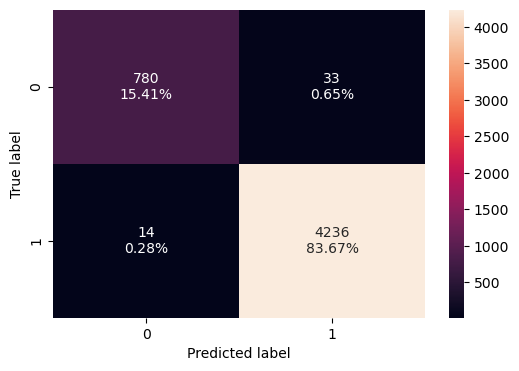

In [206]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(Ada_org_tuned, X_train, y_train)

In [207]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(Ada_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.964121,0.991373,0.96673,0.978896


In [208]:
# Saving the tuned model's scores for later comparison.
Ada_org_tuned_val_scores = model_performance_classification_sklearn(Ada_org_tuned, X_val, y_val)

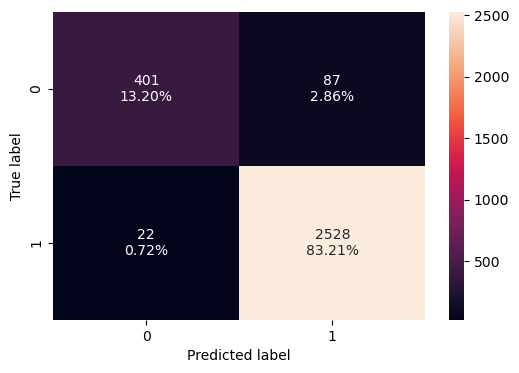

In [209]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(Ada_org_tuned, X_val, y_val)

#### Models built on oversampled data

##### XGBoost (oversampled training data)

In [210]:
# Defining the model.
XGB_over = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9754946602419924:


In [211]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_over_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.05,
    gamma=1)

# Fitting the tuned model to the oversampled traning data.
XGB_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [212]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(XGB_over_tuned, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.990118,0.986824,0.993368,0.990085


In [213]:
# Saving the tuned model's scores for later comparison.
XGB_over_tuned_train_scores = model_performance_classification_sklearn(XGB_over_tuned, X_train_over, y_train_over)

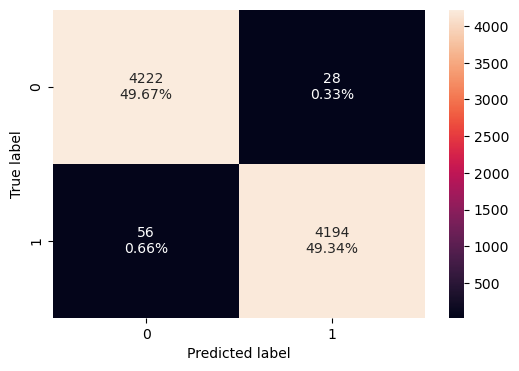

In [214]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(XGB_over_tuned, X_train_over, y_train_over)

In [215]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_over_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.95655,0.970196,0.977866,0.974016


In [216]:
# Saving the tuned model's scores for later comparison.
XGB_over_tuned_val_scores = model_performance_classification_sklearn(XGB_over_tuned, X_val, y_val)

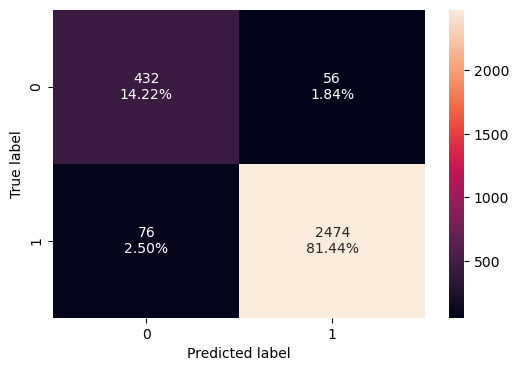

In [217]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_over_tuned, X_val, y_val)

##### AdaBoost (oversampled training data)

In [221]:
# Defining the model.
Ada_over = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
          "n_estimators": np.arange(50,110,25),
          "learning_rate": [0.01,0.05,0.1],
          # "base_estimator": [
        # DecisionTreeClassifier(max_depth=2, random_state=1),
        # DecisionTreeClassifier(max_depth=3, random_state=1),
        # ]
        "estimator":[
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
          
        ]
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=Ada_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9654175337488724:


In [223]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
Ada_over_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fitting the model to the oversampled training data.
Ada_over_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [224]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(Ada_over_tuned, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.988706,0.987294,0.99009,0.98869


In [225]:
# Saving the tuned model's scores for later comparison.
Ada_over_tuned_train_scores = model_performance_classification_sklearn(Ada_over_tuned, X_train_over, y_train_over)

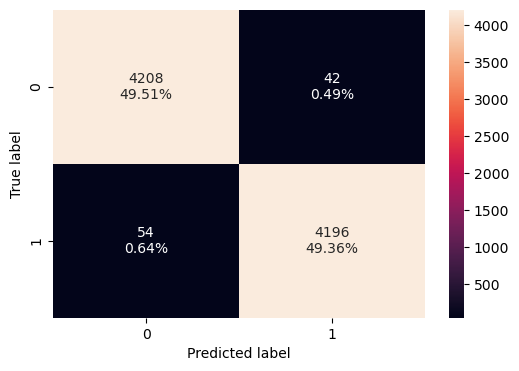

In [226]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(Ada_over_tuned, X_train_over, y_train_over)

In [227]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(Ada_over_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.965109,0.980392,0.978091,0.97924


In [228]:
# Saving the tuned model's scores for later comparison.
Ada_over_tuned_val_scores = model_performance_classification_sklearn(Ada_over_tuned, X_val, y_val)

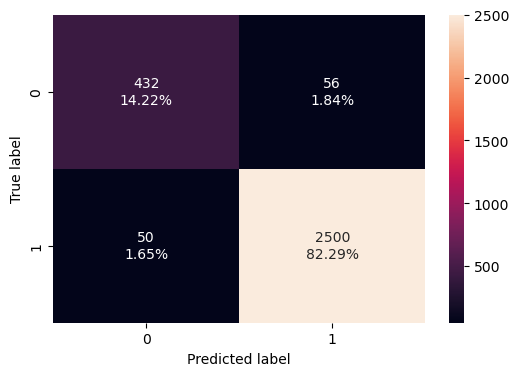

In [229]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(Ada_over_tuned, X_val, y_val)

##### Gradient Boost (oversampled training data)

In [230]:
# Defining the model.
GBC_over = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9489865351392494:


In [231]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_over_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the original training data.
GBC_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [232]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(GBC_over_tuned, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [233]:
# Saving the tuned model's scores for later comparison.
GBC_over_tuned_train_scores = model_performance_classification_sklearn(GBC_over_tuned, X_train_over, y_train_over)

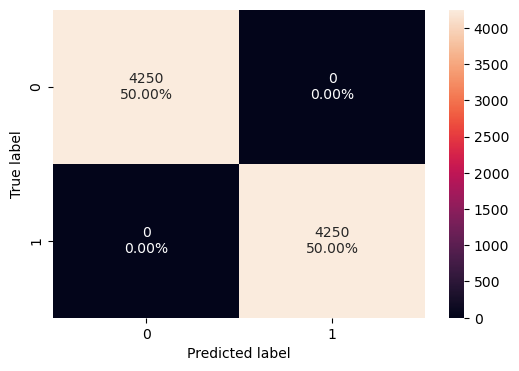

In [234]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(GBC_over_tuned, X_train_over, y_train_over)

In [235]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_over_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.93318,0.951765,0.968089,0.959858


In [236]:
# Saving the tuned model's scores for later comparison.
GBC_over_tuned_val_scores = model_performance_classification_sklearn(GBC_over_tuned, X_val, y_val)

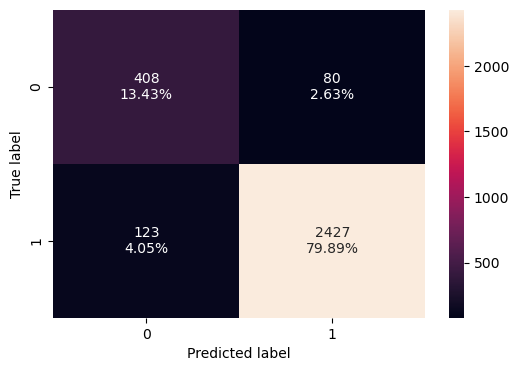

In [237]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_over_tuned, X_val, y_val)

#### Models built on undersampled data

##### Gradient Boost (undersampled training data)

In [238]:
# Defining the model.
GBC_un = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8892064036527325:


In [239]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_un_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the undersampled training data.
GBC_un_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [240]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(GBC_un_tuned, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [241]:
# Saving the tuned model's scores for later comparison.
GBC_un_tuned_train_scores = model_performance_classification_sklearn(GBC_un_tuned, X_train_un, y_train_un)

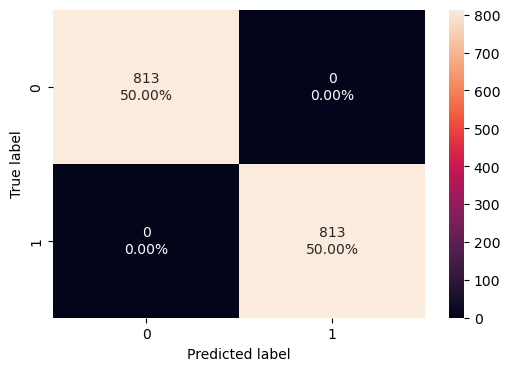

In [242]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(GBC_un_tuned, X_train_un, y_train_un)

In [243]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_un_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.885451,0.889804,0.971318,0.928776


In [244]:
# Saving the tuned model's scores for later comparison.
GBC_un_tuned_val_scores = model_performance_classification_sklearn(GBC_un_tuned, X_val, y_val)

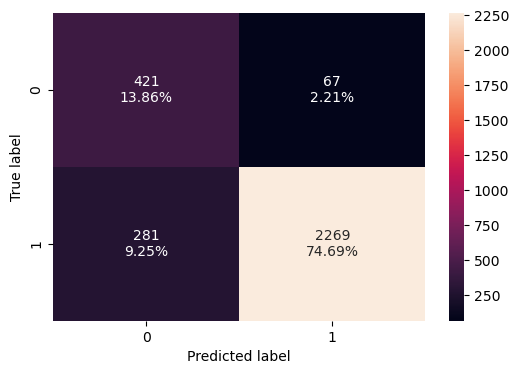

In [245]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_un_tuned, X_val, y_val)

##### Random Forest (undersampled training data)

In [246]:
# Defining the model.
RF_un = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9320736819168681:


In [247]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
RF_un_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt')

# Fitting the tuned model to the undersampled traning data.
RF_un_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [248]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(RF_un_tuned, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.99631,0.99262,1.0,0.996296


In [249]:
# Saving the tuned model's scores for later comparison.
RF_un_tuned_train_scores = model_performance_classification_sklearn(RF_un_tuned, X_train_un, y_train_un)

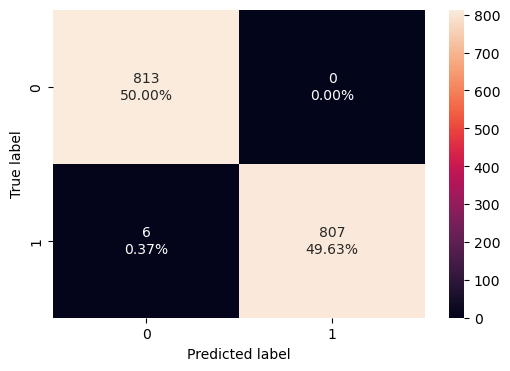

In [250]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(RF_un_tuned, X_train_un, y_train_un)

In [251]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(RF_un_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.923305,0.919608,0.988201,0.952671


In [252]:
# Saving the tuned model's scores for later comparison.
RF_un_tuned_val_scores = model_performance_classification_sklearn(RF_un_tuned, X_val, y_val)

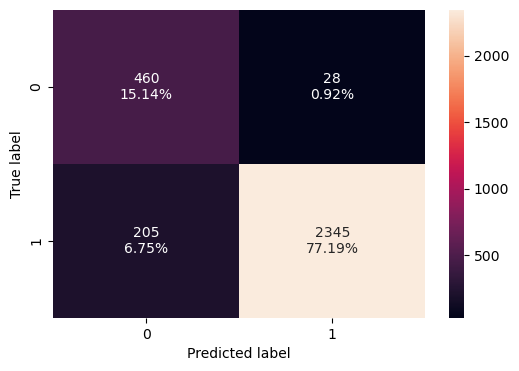

In [253]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(RF_un_tuned, X_val, y_val)

##### AdaBoost (undersampled training data)



In [255]:
# Defining the model.
Ada_un = AdaBoostClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Defining the scorer.
scorer = make_scorer(precision_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=Ada_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/gurvindra/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.952813496431437:


In [257]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
Ada_un_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=75,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1))

# Fitting the tuned model to the undersampled traning data.
Ada_un_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [258]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(Ada_un_tuned, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.96433,0.95326,0.974843,0.96393


In [259]:
# Saving the tuned model's scores for later comparison.
Ada_un_tuned_train_scores = model_performance_classification_sklearn(Ada_un_tuned, X_train_un, y_train_un)

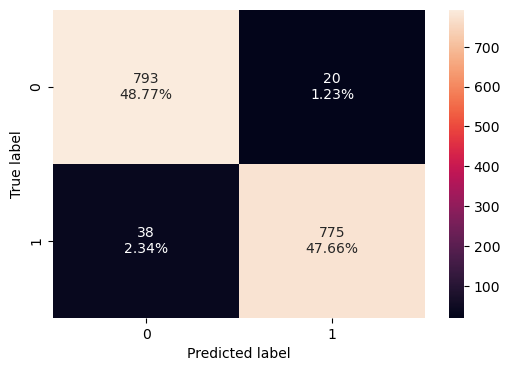

In [260]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(Ada_un_tuned, X_train_un, y_train_un)

In [261]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(Ada_un_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.927913,0.92549,0.987861,0.955659


In [262]:
# Saving the tuned model's scores for later comparison.
Ada_un_tuned_val_scores = model_performance_classification_sklearn(Ada_un_tuned, X_val, y_val)

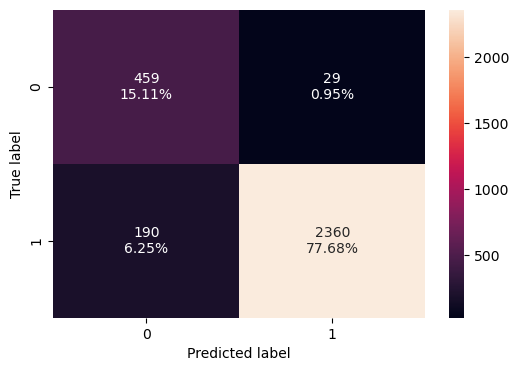

In [263]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(Ada_un_tuned, X_val, y_val)

## Model Comparison and Final Model Selection

In [264]:
# Training performance comparison.

models_train_comp_df = pd.concat(
    [
        XGB_org_tuned_train_scores.T,
        GBC_org_tuned_train_scores.T,
        Ada_org_tuned_train_scores.T,
        XGB_over_tuned_train_scores.T,
        Ada_over_tuned_train_scores.T,
        GBC_over_tuned_train_scores.T,
        GBC_un_tuned_train_scores.T,
        RF_un_tuned_train_scores.T,
        Ada_un_tuned_train_scores.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
      "XGBoost trained with Original data",
      "Gradient boosting trained with Original data",
      "AdaBoost trained with Original data",
      "XGBoost trained with Oversampled data",
      "AdaBoost trained with Oversampled data",
      "Gradient boosting trained with Oversampled data",
      "Gradient boosting trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "AdaBoost trained with Undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost trained with Original data,Gradient boosting trained with Original data,AdaBoost trained with Original data,XGBoost trained with Oversampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,Random Forest trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.990717,1.0,0.990717,0.990118,0.988706,1.0,1.0,0.996310,0.964330
Recall,0.996471,1.0,0.996706,0.986824,0.987294,1.0,1.0,0.992620,0.953260
Precision,0.992501,1.0,0.992270,0.993368,0.990090,1.0,1.0,1.000000,0.974843
F1,0.994482,1.0,0.994483,0.990085,0.988690,1.0,1.0,0.996296,0.963930


In [265]:
# Validation performance comparison.

models_val_comp_df = pd.concat(
    [
        XGB_org_tuned_val_scores.T,
        GBC_org_tuned_val_scores.T,
        Ada_org_tuned_val_scores.T,
        XGB_over_tuned_val_scores.T,
        Ada_over_tuned_val_scores.T,
        GBC_over_tuned_val_scores.T,
        GBC_un_tuned_val_scores.T,
        RF_un_tuned_val_scores.T,
        Ada_un_tuned_val_scores.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
      "XGBoost trained with Original data",
      "Gradient boosting trained with Original data",
      "AdaBoost trained with Original data",
      "XGBoost trained with Oversampled data",
      "AdaBoost trained with Oversampled data",
      "Gradient boosting trained with Oversampled data",
      "Gradient boosting trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "AdaBoost trained with Undersampled data"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost trained with Original data,Gradient boosting trained with Original data,AdaBoost trained with Original data,XGBoost trained with Oversampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,Random Forest trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.960171,0.938446,0.964121,0.956550,0.965109,0.933180,0.885451,0.923305,0.927913
Recall,0.985490,0.964706,0.991373,0.970196,0.980392,0.951765,0.889804,0.919608,0.925490
Precision,0.967655,0.962065,0.966730,0.977866,0.978091,0.968089,0.971318,0.988201,0.987861
F1,0.976491,0.963384,0.978896,0.974016,0.979240,0.959858,0.928776,0.952671,0.955659


### Test set final performance

* The 3 models with the highest precision scores were chosen to be ran on the test data.

In [266]:
# Saving the top 3 tuned model's scores for later comparison.
RF_un_tuned_test_scores = model_performance_classification_sklearn(RF_un_tuned, X_test, y_test)
Ada_un_tuned_test_scores = model_performance_classification_sklearn(Ada_un_tuned, X_test, y_test)
Ada_over_tuned_test_scores = model_performance_classification_sklearn(Ada_over_tuned, X_test, y_test)

In [267]:
# Top 3 model test performance comparison.
models_test_comp_df = pd.concat(
    [
        RF_un_tuned_test_scores.T,
        Ada_un_tuned_test_scores.T,
        Ada_over_tuned_test_scores.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
      "Random Forest trained with Undersampled data",
      "AdaBoost trained with Undersampled data",
      "AdaBoost trained with Oversampled data"
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Random Forest trained with Undersampled data,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data
Accuracy,0.935341,0.937808,0.966436
Recall,0.937059,0.937647,0.981765
Precision,0.985158,0.987608,0.978312
F1,0.960506,0.961979,0.980035


* The model with highest precision score on test data was chosen for final model.
* This model was the AdaBoost model that was tuned and trained on undersampled training data.

In [268]:
# Creating final model.
model_final = Ada_un_tuned

In [269]:
model_final.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

* First exposure to the final model on test data.

In [270]:
# Checking the final tuned model's performance metrics on the test data.
model_performance_classification_sklearn(model_final, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.952122,0.99,0.954623,0.97199


* Model has a precision score of 98%, this is a very good precision score.

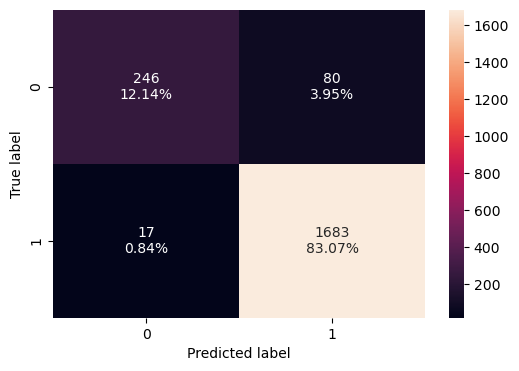

In [271]:
# Creating the confusion matrix for the final tuned model's performance on the test data.
confusion_matrix_sklearn(model_final, X_test, y_test)

* By maximizing the Precision, the model sucessfully minimized False Positive (FP) occurrences.
* FP are cases when the model incorrectly predicts the customer will not attrit, but they do.
* FP should be minimized because each FP occurrence will result in a lost customer.

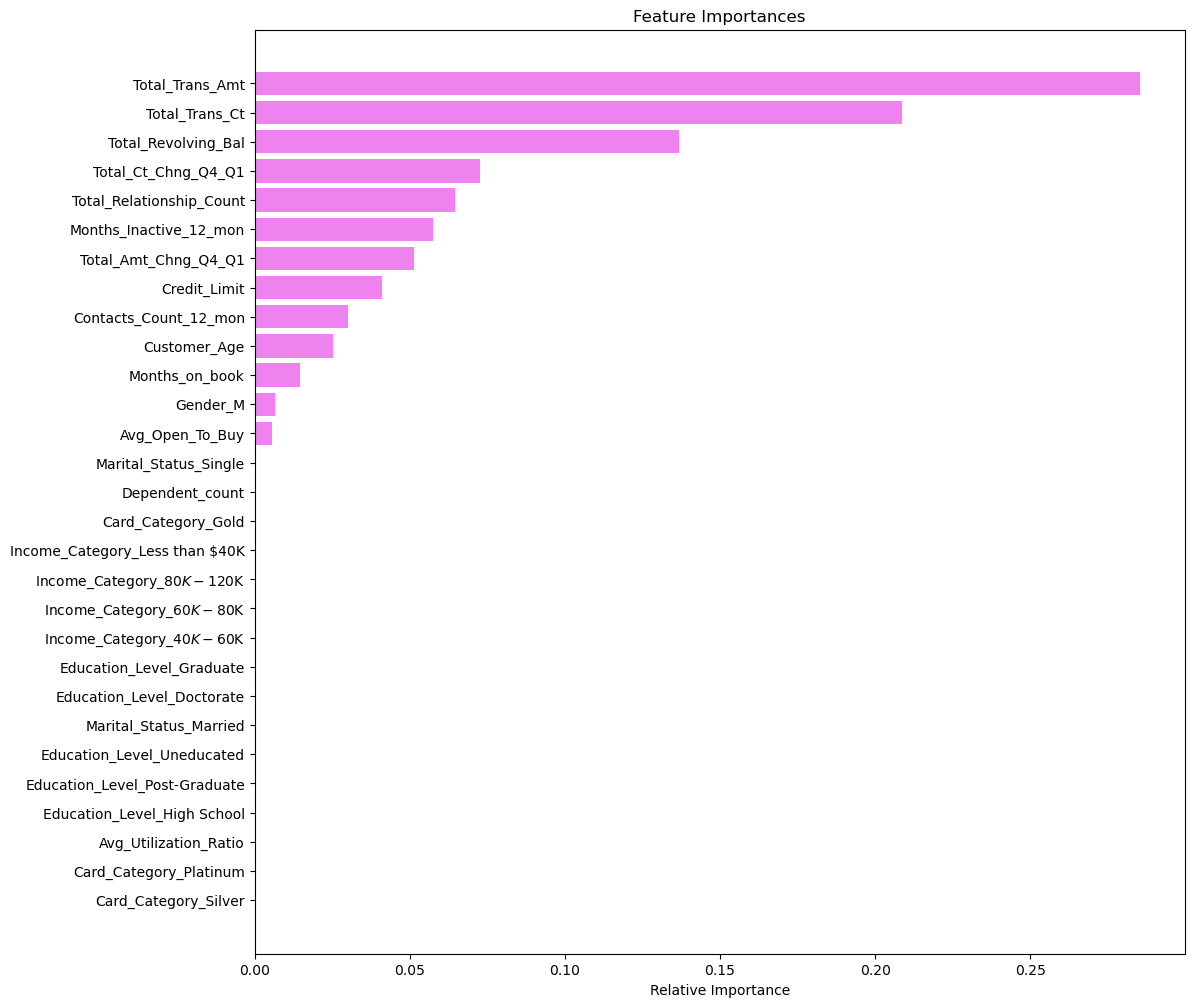

In [272]:
# Creating a figure showing the relative importances of the independent variables.

feature_names = X_train.columns
importances =  model_final.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [277]:
joblib.dump(model_final,'churn_model.pkl')
print("model save successfully")

model save successfully


* The most important features of the data set are:
  * Total_Trans_Amt
  * Total_Trans_Ct
  * Total_Revolving_Bal
  * Total_Ct_Chng_Q4_Q1
  * Total_Amt_Chng_Q4_Q1
  * Total_Relationship_Ct




# Business Insights and Conclusions



---


* Attrited customers are likely to spend less and spend less frequently. Try to get customers to spend more and more frequently to retain customers.
* Customers with extreme `Total_Revolving_Bal` are likely to attrit. Customers with a very low revolving balance can easily pay off their balance and leave the product behind, but on the other side, customers with a very high revolving balance are more likely to be lost to default.
* Ideally customers keep a `Total_Revolving_Bal`, but one that is moderate. This way the bank makes money on the interest, and the customer can afford to keep their balance in control, but the customer is still making payments and can't as easily attrit.
* `Total_Ct_Chg_Q4_Q1` is higher for existing customers, indicating existing customers are more likely to spend later in the year than attrited customers. Attrited customers may use the card when they are pressured to do so financially and are only using the product out of necessity.
* Customers with 1 or 2 products are more likely to attrit than those with 3 or more products. A potential strategy to retain customers could be to increase the strength of the bank's relationship with the customer by offering them additional products that the bank offers.


---

